In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import time
from dask import dataframe as df1
import warnings
import os

os.getcwd()
os.chdir(r"C:\Users\yekaa\Downloads")

C:\Users\yekaa\anaconda3.0\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\yekaa\anaconda3.0\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\yekaa\anaconda3.0\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


In [2]:
data = pd.read_csv("datacleantarget_2021_with_Dummies.csv", nrows=2000000)
default = pd.read_csv("default_new.csv")

<ipython-input-2-0933fb63b337>:1: DtypeWarning: Columns (6,7,8,9,10,11,12,13,14,15,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("datacleantarget_2021_with_Dummies.csv", nrows=2000000)


In [3]:
data.head()

,Unnamed: 0,derived_msa-md,lei,state_code,census_tract,loan_amount,loan_to_value_ratio,interest_rate,rate_spread,total_loan_costs,...,balloon_payment_1,balloon_payment_2,balloon_payment_1111,applicant_age_25-34,applicant_age_35-44,applicant_age_45-54,applicant_age_55-64,applicant_age_65-74,applicant_age_<25,applicant_age_>74
0,0,29820,549300PFJ7GCGDLB2E65,NV,3.200301e+10,235000.0,95.0,3.75,1.066,5021.3,...,0,1,0,0,1,0,0,0,0,0
1,1,29820,549300PFJ7GCGDLB2E65,NV,3.200301e+10,335000.0,66.4,3.75,0.799,4138.5,...,0,1,0,0,1,0,0,0,0,0
2,2,29820,549300Q50XCC0473FG63,NV,3.200301e+10,125000.0,79.475,4.75,1.92,NaN,...,0,1,0,0,1,0,0,0,0,0
3,4,29820,549300U3721PJGQZYY68,NV,3.200301e+10,305000.0,75.0,2.5,0.214,4754.0,...,0,1,0,0,0,0,0,1,0,0
4,8,29820,549300SVLCM6NZQ53P14,NV,3.200301e+10,285000.0,90.0,3.625,1.318,10488.25,...,0,1,0,0,0,1,0,0,0,0


In [4]:
data['location'] = data['countyname'] + ' ' + data['state_code'] 
data = data.drop(['state_code', 'countyname'], axis=1)
data = data.rename(columns={'location': "countyname"})

In [5]:
default.head()

,Unnamed: 0,loan_id,orig_chn,seller,interest_rate,loan_amount,loan_term,oltv,loan_to_value_ratio,num_bo,...,prepay,rela_upb,seller_cate,servicer_cate,loan_purpose_1,loan_purpose_other,loan_purpose_31,loan_purpose_32,debt_to_income_ratio,occupancy_type
0,0,1.000000e+11,R,OTHER,8.250,50000,360,50,50,2,...,1,0.378788,0,1,1,0,0,0,4,1
1,1,1.000000e+11,R,"GMAC MORTGAGE, LLC",8.000,170000,360,80,80,2,...,1,0.854271,2,2,1,0,0,0,5,1
2,3,1.010000e+11,B,"JP MORGAN CHASE BANK, NA",8.500,141000,360,74,74,2,...,1,0.792135,1,1,1,0,0,0,4,1
3,4,1.010000e+11,R,"JP MORGAN CHASE BANK, NA",8.050,63000,180,61,61,2,...,0,0.353933,1,1,0,0,0,1,2,1
4,5,1.010000e+11,C,"JPMORGAN CHASE BANK, NA",7.875,56000,360,78,78,1,...,1,0.386207,1,1,1,0,0,0,3,1


In [6]:
flood2021 = data[data["Approval"] == 1]
flood2021.shape

(1688536, 152)

In [7]:
flood2021['agg_ff'] = np.round((flood2021['count_floodfactor1'] * 1 + flood2021['count_floodfactor2'] * 2 + flood2021['count_floodfactor3'] * 3 + flood2021['count_floodfactor4'] * 4 + flood2021['count_floodfactor5'] * 5 + flood2021['count_floodfactor6'] * 6 + flood2021['count_floodfactor7'] * 7 + flood2021['count_floodfactor8'] * 8 + flood2021['count_floodfactor9'] * 9 + flood2021['count_floodfactor10'] * 10) / flood2021['count_property_x'], decimals=2)

<ipython-input-7-c5fcf612e2d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flood2021['agg_ff'] = np.round((flood2021['count_floodfactor1'] * 1 + flood2021['count_floodfactor2'] * 2 + flood2021['count_floodfactor3'] * 3 + flood2021['count_floodfactor4'] * 4 + flood2021['count_floodfactor5'] * 5 + flood2021['count_floodfactor6'] * 6 + flood2021['count_floodfactor7'] * 7 + flood2021['count_floodfactor8'] * 8 + flood2021['count_floodfactor9'] * 9 + flood2021['count_floodfactor10'] * 10) / flood2021['count_property_x'], decimals=2)


flood2021['agg_class'] = 'default'  # set default value for all rows
flood2021.loc[(flood2021['agg_ff'] >=0) & (flood2021['agg_ff']<=2), 'agg_class'] = 'one'  # set value to 'high' for rows where 'A' > 3 and 'B' > 30
flood2021.loc[(flood2021['agg_ff'] >2) & (flood2021['agg_ff']<=3), 'agg_class'] = 'two'
flood2021.loc[(flood2021['agg_ff'] >3) & (flood2021['agg_ff']<=4), 'agg_class'] = 'three'
flood2021.loc[(flood2021['agg_ff'] >4) & (flood2021['agg_ff']<=5), 'agg_class'] = 'four'
flood2021.loc[(flood2021['agg_ff'] >5) & (flood2021['agg_ff']<=6), 'agg_class'] = 'five'
flood2021.loc[(flood2021['agg_ff'] >6) & (flood2021['agg_ff']<=7), 'agg_class'] = 'six'
flood2021.loc[(flood2021['agg_ff'] >7) & (flood2021['agg_ff']<=8), 'agg_class'] = 'seven'
flood2021.loc[(flood2021['agg_ff'] >8) & (flood2021['agg_ff']<=9), 'agg_class'] = 'eight'
flood2021.loc[(flood2021['agg_ff'] >9) & (flood2021['agg_ff']<=10), 'agg_class'] = 'nine'
flood2021.loc[(flood2021['agg_ff'] >10) & (flood2021['agg_ff']<=11), 'agg_class'] = 'ten'

In [8]:
flood2021['agg_class'] = 'default'  # set default value for all rows
flood2021.loc[(flood2021['agg_ff'] >=0) & (flood2021['agg_ff']<=3), 'agg_class'] = 'Low Risk'  # set value to 'high' for rows where 'A' > 3 and 'B' > 30
flood2021.loc[(flood2021['agg_ff'] >3) & (flood2021['agg_ff']<=10), 'agg_class'] = 'High Risk'

<ipython-input-8-d431822f94f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flood2021['agg_class'] = 'default'  # set default value for all rows


In [9]:
flood2021.head()

,Unnamed: 0,derived_msa-md,lei,census_tract,loan_amount,loan_to_value_ratio,interest_rate,rate_spread,total_loan_costs,total_points_and_fees,...,applicant_age_25-34,applicant_age_35-44,applicant_age_45-54,applicant_age_55-64,applicant_age_65-74,applicant_age_<25,applicant_age_>74,countyname,agg_ff,agg_class
0,0,29820,549300PFJ7GCGDLB2E65,3.200301e+10,235000.0,95.0,3.75,1.066,5021.3,NaN,...,0,1,0,0,0,0,0,Clark County NV,1.45,Low Risk
1,1,29820,549300PFJ7GCGDLB2E65,3.200301e+10,335000.0,66.4,3.75,0.799,4138.5,NaN,...,0,1,0,0,0,0,0,Clark County NV,1.45,Low Risk
2,2,29820,549300Q50XCC0473FG63,3.200301e+10,125000.0,79.475,4.75,1.92,NaN,NaN,...,0,1,0,0,0,0,0,Clark County NV,1.45,Low Risk
3,4,29820,549300U3721PJGQZYY68,3.200301e+10,305000.0,75.0,2.5,0.214,4754.0,NaN,...,0,0,0,0,1,0,0,Clark County NV,1.45,Low Risk
4,8,29820,549300SVLCM6NZQ53P14,3.200301e+10,285000.0,90.0,3.625,1.318,10488.25,NaN,...,0,0,1,0,0,0,0,Clark County NV,1.45,Low Risk


In [10]:
loans = flood2021[['census_tract','agg_ff','agg_class','countyname','loan_amount','loan_to_value_ratio','debt_to_income_ratio','interest_rate', 
'total_loan_costs','origination_charges','loan_term','property_value','income','tract_population', 'tract_minority_population_percent', 
'ffiec_msa_md_median_family_income', 'tract_to_msa_income_percentage', 'tract_owner_occupied_units', 'tract_one_to_four_family_homes',
'tract_median_age_of_housing_units','conforming_loan_limit_C', 'conforming_loan_limit_NC', 'conforming_loan_limit_U', 
'derived_loan_product_type_Conventional:First Lien', 'derived_loan_product_type_Conventional:Subordinate Lien', 'derived_loan_product_type_FHA:First Lien', 'derived_loan_product_type_FHA:Subordinate Lien', 'derived_loan_product_type_FSA/RHS:First Lien', 
'derived_loan_product_type_FSA/RHS:Subordinate Lien', 'derived_loan_product_type_VA:First Lien', 'derived_loan_product_type_VA:Subordinate Lien', 
'derived_dwelling_category_Multifamily:Manufactured', 'derived_dwelling_category_Multifamily:Site-Built', 'derived_dwelling_category_Single Family (1-4 Units):Manufactured', 'derived_dwelling_category_Single Family (1-4 Units):Site-Built', 
'derived_ethnicity_Hispanic or Latino', 'derived_ethnicity_Joint', 'derived_race_2 or more minority races', 'derived_race_American Indian or Alaska Native', 'derived_race_Asian', 'derived_race_Black or African American', 'derived_race_Joint', 'derived_race_Native Hawaiian or Other Pacific Islander', 'derived_race_White', 
'derived_sex_Female', 'derived_sex_Joint', 'derived_sex_Male', 
'purchaser_type_0', 'purchaser_type_1', 'purchaser_type_2', 'purchaser_type_3', 'purchaser_type_4', 'purchaser_type_5', 'purchaser_type_6', 'purchaser_type_8', 'purchaser_type_9', 'purchaser_type_71', 'purchaser_type_72', 
'loan_purpose_1', 'loan_purpose_2', 'loan_purpose_4', 'loan_purpose_5', 'loan_purpose_31', 'loan_purpose_32', 
'reverse_mortgage_1', 'reverse_mortgage_2', 'reverse_mortgage_1111', 
'open-end_line_of_credit_1', 'open-end_line_of_credit_2', 'open-end_line_of_credit_1111', 
'business_or_commercial_purpose_1', 'business_or_commercial_purpose_2', 'business_or_commercial_purpose_1111', 
'hoepa_status_1', 'hoepa_status_2', 'hoepa_status_3', 
'negative_amortization_1', 'negative_amortization_2', 'negative_amortization_1111', 
'interest_only_payment_1', 'interest_only_payment_2', 'interest_only_payment_1111', 
'balloon_payment_1', 'balloon_payment_2', 'balloon_payment_1111', 
'applicant_age_25-34', 'applicant_age_35-44', 'applicant_age_45-54', 'applicant_age_55-64', 'applicant_age_65-74', 'applicant_age_<25', 'applicant_age_>74']]

In [11]:
loans = loans.replace('Exempt', None)

In [12]:
na_counts = loans.isna().sum()
na_counts_sorted = na_counts.sort_values(ascending=False)
na_counts_sorted

total_loan_costs                                                    222115
origination_charges                                                 216795
debt_to_income_ratio                                                136040
loan_to_value_ratio                                                 122448
income                                                              101561
                                                                     ...  
derived_ethnicity_Hispanic or Latino                                     0
derived_dwelling_category_Single Family (1-4 Units):Site-Built           0
derived_dwelling_category_Single Family (1-4 Units):Manufactured         0
derived_dwelling_category_Multifamily:Site-Built                         0
applicant_age_>74                                                        0
Length: 92, dtype: int64

In [13]:
loans = loans.dropna()
loans.shape

(1321809, 92)

In [14]:
loans['debt_to_income_ratio'].unique()

array(['45', '20%-<30%', '38', '40', '30%-<36%', '49', '43', '47',
       '50%-60%', '44', '>60%', '42', '41', '<20%', '46', '36', '39',
       '37', '48'], dtype=object)

In [15]:
replacement_dict = {'20%-<30%': '25', '30%-<36%': '33', '50%-60%': '55', '>60%': '75', '<20%': '15'}
loans['debt_to_income_ratio'] = loans['debt_to_income_ratio'].replace(replacement_dict)
loans['debt_to_income_ratio']

0          45
1          25
3          38
4          25
5          40
           ..
1999994    33
1999996    33
1999997    39
1999998    37
1999999    49
Name: debt_to_income_ratio, Length: 1321809, dtype: object

In [16]:
loans['debt_to_income_ratio'] = loans['debt_to_income_ratio'].astype(int)
# Replace values based on conditions
loans.loc[loans['debt_to_income_ratio'] <= 20, 'debt_to_income_ratio'] = 0
loans.loc[(loans['debt_to_income_ratio'] >20) & (loans['debt_to_income_ratio'] <= 30), 'debt_to_income_ratio'] = 1
loans.loc[(loans['debt_to_income_ratio'] >30) & (loans['debt_to_income_ratio'] <= 40), 'debt_to_income_ratio'] = 2
loans.loc[(loans['debt_to_income_ratio'] >40) & (loans['debt_to_income_ratio'] <= 50), 'debt_to_income_ratio'] = 3
loans.loc[(loans['debt_to_income_ratio'] >50) & (loans['debt_to_income_ratio'] <= 60), 'debt_to_income_ratio'] = 4
loans.loc[loans['debt_to_income_ratio'] >60,  'debt_to_income_ratio'] = 5

In [17]:
# Create new column by adding columns A and B
loans = loans.assign(loan_purpose_other= loans['loan_purpose_2'] + loans['loan_purpose_4']+ loans['loan_purpose_5'])

# Drop columns A and B
loans = loans.drop(['loan_purpose_2','loan_purpose_4','loan_purpose_5'], axis=1)


In [18]:
loans['FICO'] = 680
loans.head()

,census_tract,agg_ff,agg_class,countyname,loan_amount,loan_to_value_ratio,debt_to_income_ratio,interest_rate,total_loan_costs,origination_charges,...,balloon_payment_1111,applicant_age_25-34,applicant_age_35-44,applicant_age_45-54,applicant_age_55-64,applicant_age_65-74,applicant_age_<25,applicant_age_>74,loan_purpose_other,FICO
0,3.200301e+10,1.45,Low Risk,Clark County NV,235000.0,95.0,3,3.75,5021.3,1495.0,...,0,0,1,0,0,0,0,0,0,680
1,3.200301e+10,1.45,Low Risk,Clark County NV,335000.0,66.4,1,3.75,4138.5,2355.0,...,0,0,1,0,0,0,0,0,0,680
3,3.200301e+10,1.45,Low Risk,Clark County NV,305000.0,75.0,2,2.5,4754.0,1965.0,...,0,0,0,0,0,1,0,0,0,680
4,3.200301e+10,1.45,Low Risk,Clark County NV,285000.0,90.0,1,3.625,10488.25,7495.25,...,0,0,0,1,0,0,0,0,0,680
5,3.200301e+10,1.45,Low Risk,Clark County NV,235000.0,95.0,2,2.99,9133.3,5905.0,...,0,0,0,0,0,0,1,0,0,680


In [19]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1321809 entries, 0 to 1999999
Data columns (total 91 columns):
 #   Column                                                            Non-Null Count    Dtype  
---  ------                                                            --------------    -----  
 0   census_tract                                                      1321809 non-null  float64
 1   agg_ff                                                            1321809 non-null  float64
 2   agg_class                                                         1321809 non-null  object 
 3   countyname                                                        1321809 non-null  object 
 4   loan_amount                                                       1321809 non-null  float64
 5   loan_to_value_ratio                                               1321809 non-null  object 
 6   debt_to_income_ratio                                              1321809 non-null  int32  
 7   interest_

In [20]:
loans = loans.astype({'loan_to_value_ratio':'float','interest_rate':'float', 
                      'total_loan_costs': 'float', 'origination_charges':'float', 
                      'loan_term':'float','property_value':'float'})
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1321809 entries, 0 to 1999999
Data columns (total 91 columns):
 #   Column                                                            Non-Null Count    Dtype  
---  ------                                                            --------------    -----  
 0   census_tract                                                      1321809 non-null  float64
 1   agg_ff                                                            1321809 non-null  float64
 2   agg_class                                                         1321809 non-null  object 
 3   countyname                                                        1321809 non-null  object 
 4   loan_amount                                                       1321809 non-null  float64
 5   loan_to_value_ratio                                               1321809 non-null  float64
 6   debt_to_income_ratio                                              1321809 non-null  int32  
 7   interest_

In [21]:
default.head()

,Unnamed: 0,loan_id,orig_chn,seller,interest_rate,loan_amount,loan_term,oltv,loan_to_value_ratio,num_bo,...,prepay,rela_upb,seller_cate,servicer_cate,loan_purpose_1,loan_purpose_other,loan_purpose_31,loan_purpose_32,debt_to_income_ratio,occupancy_type
0,0,1.000000e+11,R,OTHER,8.250,50000,360,50,50,2,...,1,0.378788,0,1,1,0,0,0,4,1
1,1,1.000000e+11,R,"GMAC MORTGAGE, LLC",8.000,170000,360,80,80,2,...,1,0.854271,2,2,1,0,0,0,5,1
2,3,1.010000e+11,B,"JP MORGAN CHASE BANK, NA",8.500,141000,360,74,74,2,...,1,0.792135,1,1,1,0,0,0,4,1
3,4,1.010000e+11,R,"JP MORGAN CHASE BANK, NA",8.050,63000,180,61,61,2,...,0,0.353933,1,1,0,0,0,1,2,1
4,5,1.010000e+11,C,"JPMORGAN CHASE BANK, NA",7.875,56000,360,78,78,1,...,1,0.386207,1,1,1,0,0,0,3,1


In [22]:
default = default[['delin_90','loan_amount','loan_to_value_ratio','interest_rate','debt_to_income_ratio','loan_term','loan_purpose_1', 'loan_purpose_other','loan_purpose_31', 'loan_purpose_32']]
default.head()

,delin_90,loan_amount,loan_to_value_ratio,interest_rate,debt_to_income_ratio,loan_term,loan_purpose_1,loan_purpose_other,loan_purpose_31,loan_purpose_32
0,0,50000,50,8.250,4,360,1,0,0,0
1,0,170000,80,8.000,5,360,1,0,0,0
2,0,141000,74,8.500,4,360,1,0,0,0
3,1,63000,61,8.050,2,180,0,0,0,1
4,0,56000,78,7.875,3,360,1,0,0,0


In [23]:
default['delin_90'].value_counts()

0    63702
1     4002
Name: delin_90, dtype: int64

In [24]:
print(default.info())
print(default.isna().sum())
print(default.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67704 entries, 0 to 67703
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   delin_90              67704 non-null  int64  
 1   loan_amount           67704 non-null  int64  
 2   loan_to_value_ratio   67704 non-null  int64  
 3   interest_rate         67704 non-null  float64
 4   debt_to_income_ratio  67704 non-null  int64  
 5   loan_term             67704 non-null  int64  
 6   loan_purpose_1        67704 non-null  int64  
 7   loan_purpose_other    67704 non-null  int64  
 8   loan_purpose_31       67704 non-null  int64  
 9   loan_purpose_32       67704 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 5.2 MB
None
delin_90                0
loan_amount             0
loan_to_value_ratio     0
interest_rate           0
debt_to_income_ratio    0
loan_term               0
loan_purpose_1          0
loan_purpose_other      0
loan_purpose_31 

In [25]:
loans_def = loans[['loan_amount','loan_to_value_ratio','interest_rate','debt_to_income_ratio','loan_term','loan_purpose_1', 'loan_purpose_other','loan_purpose_31', 'loan_purpose_32']]
loans_def.head()

,loan_amount,loan_to_value_ratio,interest_rate,debt_to_income_ratio,loan_term,loan_purpose_1,loan_purpose_other,loan_purpose_31,loan_purpose_32
0,235000.0,95.0,3.750,3,360.0,1,0,0,0
1,335000.0,66.4,3.750,1,360.0,1,0,0,0
3,305000.0,75.0,2.500,2,180.0,1,0,0,0
4,285000.0,90.0,3.625,1,360.0,1,0,0,0
5,235000.0,95.0,2.990,2,360.0,1,0,0,0


Mean: 367028.11
Median: 295000.00
Standard Deviation: 312082.90
Minimum Value: 5000.00
Maximum Value: 41305000.00


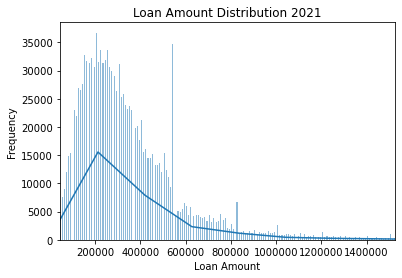

,mean,median,std,min,max
Loan Amount,367028.106935,295000.0,312082.898032,5000.0,41305000.0


In [26]:
# Extract the column of interest
column_of_interest = loans['loan_amount']
# Create a histogram with density plot using Seaborn
sns.histplot(column_of_interest, kde=True)

# Add a title and axis labels
plt.title('Loan Amount Distribution 2021')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')

# Set the x-axis limits to zoom in on the highest frequency area
plt.xlim(column_of_interest.quantile(0.01), column_of_interest.quantile(0.99))
# Modify the x-axis tick format
plt.ticklabel_format(style='plain', axis='x')

# Calculate mean, median, and other metrics using Pandas
mean = column_of_interest.mean()
median = column_of_interest.median()
std = column_of_interest.std()
min_val = column_of_interest.min()
max_val = column_of_interest.max()

# Print the metrics
print('Mean: {:.2f}'.format(mean))
print('Median: {:.2f}'.format(median))
print('Standard Deviation: {:.2f}'.format(std))
print('Minimum Value: {:.2f}'.format(min_val))
print('Maximum Value: {:.2f}'.format(max_val))

# Show the plot
plt.show()

# Create a dictionary of metrics
metrics_dict = {'mean': mean, 'median': median, 'std': std, 'min': min_val, 'max': max_val}

# Create a DataFrame from the dictionary with a normal index
df1 = pd.DataFrame(metrics_dict, index=['Loan Amount'])

df1

In [27]:

# Calculate mean, median, and other metrics using Pandas
mean = loans['loan_to_value_ratio'].mean()
median = loans['loan_to_value_ratio'].median()
std = loans['loan_to_value_ratio'].std()
min_val = loans['loan_to_value_ratio'].min()
max_val = loans['loan_to_value_ratio'].max()

# Create a dictionary of metrics
metrics_dict = {'mean': mean, 'median': median, 'std': std, 'min': min_val, 'max': max_val}

# Create a DataFrame from the dictionary with a normal index
df2 = pd.DataFrame(metrics_dict, index=['Loan to Value Ratio'])

df2

,mean,median,std,min,max
Loan to Value Ratio,153.119794,73.1,95651.020185,1.1,109970000.0


In [28]:



# Calculate mean, median, and other metrics using Pandas
mean = loans['interest_rate'].mean()
median = loans['interest_rate'].median()
std = loans['interest_rate'].std()
min_val = loans['interest_rate'].min()
max_val = loans['interest_rate'].max()

# Create a dictionary of metrics
metrics_dict = {'mean': mean, 'median': median, 'std': std, 'min': min_val, 'max': max_val}

# Create a DataFrame from the dictionary with a normal index
df3 = pd.DataFrame(metrics_dict, index=['Interest Rate'])

df3



,mean,median,std,min,max
Interest Rate,2.971713,2.875,0.57292,0.0,100.0


In [29]:
# Title loans['debt_to_income_ratio']
# Calculate mean, median, and other metrics using Pandas
mean = loans['debt_to_income_ratio'].mean()
median = loans['debt_to_income_ratio'].median()
std = loans['debt_to_income_ratio'].std()
min_val = loans['debt_to_income_ratio'].min()
max_val = loans['debt_to_income_ratio'].max()



# Create a dictionary of metrics
metrics_dict = {'mean': mean, 'median': median, 'std': std, 'min': min_val, 'max': max_val}

# Create a DataFrame from the dictionary with a normal index
df4 = pd.DataFrame(metrics_dict, index=['Debt to Income Ratio'])

df4


,mean,median,std,min,max
Debt to Income Ratio,1.937623,2.0,1.005427,0,5


In [30]:
# Concatenate the dataframes
metrics = pd.concat([df1, df2, df3,df4])
metrics

,mean,median,std,min,max
Loan Amount,367028.106935,295000.000,312082.898032,5000.0,41305000.0
Loan to Value Ratio,153.119794,73.100,95651.020185,1.1,109970000.0
Interest Rate,2.971713,2.875,0.572920,0.0,100.0
Debt to Income Ratio,1.937623,2.000,1.005427,0.0,5.0


In [31]:
X_train = default.drop(['delin_90'], axis = 1)
y_train = default['delin_90']
X_test = loans_def

In [32]:
X_train.shape

(67704, 9)

In [33]:
y_train.shape

(67704,)

In [34]:
!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_resampled, y_resampled = smote.fit_resample(X_train,y_train)

df_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis = 1)

new = df_resampled
X_train = new.drop(['delin_90'], axis=1)
y_train = new['delin_90']

In [35]:
X_train.shape

(127404, 9)

In [36]:
y_train.shape

(127404,)

In [37]:
#train random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth= 18, max_features= 'sqrt', n_estimators= 200,random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=18, n_estimators=200, random_state=42)

In [38]:
train_score_rf = rf.score(X_train, y_train)
print('Train Accuracy Score', train_score_rf)

Train Accuracy Score 0.9503861731185834


In [39]:
prob_rf = rf.predict_proba(X_test)
df_prob_rf = pd.DataFrame(prob_rf)
df_prob_rf.head()

,0,1
0,0.936530,0.063470
1,0.998809,0.001191
2,0.985000,0.015000
3,0.999378,0.000622
4,0.997871,0.002129


In [40]:
pred_rf = rf.predict(X_test)
df_pred_rf = pd.DataFrame(pred_rf)
df_pred_rf.head()

,0
0,0
1,0
2,0
3,0
4,0


In [41]:
df_pred_rf[0].value_counts()

0    1298017
1      23792
Name: 0, dtype: int64

In [42]:
loans.head()

,census_tract,agg_ff,agg_class,countyname,loan_amount,loan_to_value_ratio,debt_to_income_ratio,interest_rate,total_loan_costs,origination_charges,...,balloon_payment_1111,applicant_age_25-34,applicant_age_35-44,applicant_age_45-54,applicant_age_55-64,applicant_age_65-74,applicant_age_<25,applicant_age_>74,loan_purpose_other,FICO
0,3.200301e+10,1.45,Low Risk,Clark County NV,235000.0,95.0,3,3.750,5021.30,1495.00,...,0,0,1,0,0,0,0,0,0,680
1,3.200301e+10,1.45,Low Risk,Clark County NV,335000.0,66.4,1,3.750,4138.50,2355.00,...,0,0,1,0,0,0,0,0,0,680
3,3.200301e+10,1.45,Low Risk,Clark County NV,305000.0,75.0,2,2.500,4754.00,1965.00,...,0,0,0,0,0,1,0,0,0,680
4,3.200301e+10,1.45,Low Risk,Clark County NV,285000.0,90.0,1,3.625,10488.25,7495.25,...,0,0,0,1,0,0,0,0,0,680
5,3.200301e+10,1.45,Low Risk,Clark County NV,235000.0,95.0,2,2.990,9133.30,5905.00,...,0,0,0,0,0,0,1,0,0,680


In [43]:
loans_w = loans.copy()

In [44]:
loans_w = loans_w.reset_index(drop=True)
loans_w.shape

(1321809, 91)

In [45]:
df_pred_rf = df_pred_rf.reset_index(drop=True)
df_pred_rf.shape

(1321809, 1)

In [46]:
loans_w['Pred_Default'] = df_pred_rf
loans_w.head()

,census_tract,agg_ff,agg_class,countyname,loan_amount,loan_to_value_ratio,debt_to_income_ratio,interest_rate,total_loan_costs,origination_charges,...,applicant_age_25-34,applicant_age_35-44,applicant_age_45-54,applicant_age_55-64,applicant_age_65-74,applicant_age_<25,applicant_age_>74,loan_purpose_other,FICO,Pred_Default
0,3.200301e+10,1.45,Low Risk,Clark County NV,235000.0,95.0,3,3.750,5021.30,1495.00,...,0,1,0,0,0,0,0,0,680,0
1,3.200301e+10,1.45,Low Risk,Clark County NV,335000.0,66.4,1,3.750,4138.50,2355.00,...,0,1,0,0,0,0,0,0,680,0
2,3.200301e+10,1.45,Low Risk,Clark County NV,305000.0,75.0,2,2.500,4754.00,1965.00,...,0,0,0,0,1,0,0,0,680,0
3,3.200301e+10,1.45,Low Risk,Clark County NV,285000.0,90.0,1,3.625,10488.25,7495.25,...,0,0,1,0,0,0,0,0,680,0
4,3.200301e+10,1.45,Low Risk,Clark County NV,235000.0,95.0,2,2.990,9133.30,5905.00,...,0,0,0,0,0,1,0,0,680,0


In [47]:
loans_w['Pred_Default'].value_counts()

0    1298017
1      23792
Name: Pred_Default, dtype: int64

In [48]:
f = loans_w.copy()

In [49]:
f['Ethnicity'] = np.where((f['derived_ethnicity_Hispanic or Latino'] == 1), 'Hispanice or Latino',
                          np.where((f['derived_ethnicity_Joint'] == 1), 'Ethnicity_Joint',
                                   np.where((f['derived_race_2 or more minority races'] == 1), '2 or more minority races',
                                            np.where((f['derived_race_American Indian or Alaska Native'] == 1), 'American Indian or Alaska Native',
                                                     np.where((f['derived_race_Asian'] == 1), 'Asian',
                                                              np.where((f['derived_race_Black or African American'] == 1), 'Black or African American',
                                                                       np.where((f['derived_race_Joint'] == 1), 'Race Joint',
                                                                                np.where((f['derived_race_Native Hawaiian or Other Pacific Islander'] == 1), 'Hawaiian or Other Pacific Islander',
                                                                                    np.where((f['derived_race_White'] == 1), 'White', None)))))))))

In [50]:
f.head()

,census_tract,agg_ff,agg_class,countyname,loan_amount,loan_to_value_ratio,debt_to_income_ratio,interest_rate,total_loan_costs,origination_charges,...,applicant_age_35-44,applicant_age_45-54,applicant_age_55-64,applicant_age_65-74,applicant_age_<25,applicant_age_>74,loan_purpose_other,FICO,Pred_Default,Ethnicity
0,3.200301e+10,1.45,Low Risk,Clark County NV,235000.0,95.0,3,3.750,5021.30,1495.00,...,1,0,0,0,0,0,0,680,0,2 or more minority races
1,3.200301e+10,1.45,Low Risk,Clark County NV,335000.0,66.4,1,3.750,4138.50,2355.00,...,1,0,0,0,0,0,0,680,0,White
2,3.200301e+10,1.45,Low Risk,Clark County NV,305000.0,75.0,2,2.500,4754.00,1965.00,...,0,0,0,1,0,0,0,680,0,White
3,3.200301e+10,1.45,Low Risk,Clark County NV,285000.0,90.0,1,3.625,10488.25,7495.25,...,0,1,0,0,0,0,0,680,0,White
4,3.200301e+10,1.45,Low Risk,Clark County NV,235000.0,95.0,2,2.990,9133.30,5905.00,...,0,0,0,0,1,0,0,680,0,White


In [51]:
data.head()

,Unnamed: 0,derived_msa-md,lei,census_tract,loan_amount,loan_to_value_ratio,interest_rate,rate_spread,total_loan_costs,total_points_and_fees,...,balloon_payment_2,balloon_payment_1111,applicant_age_25-34,applicant_age_35-44,applicant_age_45-54,applicant_age_55-64,applicant_age_65-74,applicant_age_<25,applicant_age_>74,countyname
0,0,29820,549300PFJ7GCGDLB2E65,3.200301e+10,235000.0,95.0,3.75,1.066,5021.3,NaN,...,1,0,0,1,0,0,0,0,0,Clark County NV
1,1,29820,549300PFJ7GCGDLB2E65,3.200301e+10,335000.0,66.4,3.75,0.799,4138.5,NaN,...,1,0,0,1,0,0,0,0,0,Clark County NV
2,2,29820,549300Q50XCC0473FG63,3.200301e+10,125000.0,79.475,4.75,1.92,NaN,NaN,...,1,0,0,1,0,0,0,0,0,Clark County NV
3,4,29820,549300U3721PJGQZYY68,3.200301e+10,305000.0,75.0,2.5,0.214,4754.0,NaN,...,1,0,0,0,0,0,1,0,0,Clark County NV
4,8,29820,549300SVLCM6NZQ53P14,3.200301e+10,285000.0,90.0,3.625,1.318,10488.25,NaN,...,1,0,0,0,1,0,0,0,0,Clark County NV


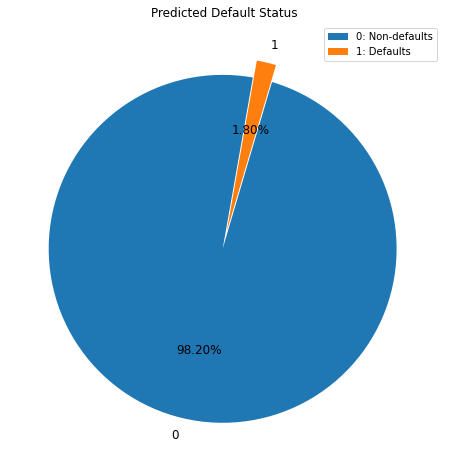

In [52]:
# Create pie chart with percentage labels and explode the two sections
explode = (0.05, 0.05)
f['Pred_Default'].value_counts().plot(kind='pie', subplots=True, autopct='%1.2f%%', explode=explode, startangle=80, 
                                      legend=True, fontsize=12, figsize=(8,8), textprops={'color':"black"})

# Add title and legend
plt.title('Predicted Default Status')
plt.legend(["0: Non-defaults","1: Defaults"])

# Remove the y-axis label and ticks
plt.ylabel("")
plt.tick_params(axis='y', which='both', length=0)

# Show plot
plt.show()

In [53]:
f.head()

,census_tract,agg_ff,agg_class,countyname,loan_amount,loan_to_value_ratio,debt_to_income_ratio,interest_rate,total_loan_costs,origination_charges,...,applicant_age_35-44,applicant_age_45-54,applicant_age_55-64,applicant_age_65-74,applicant_age_<25,applicant_age_>74,loan_purpose_other,FICO,Pred_Default,Ethnicity
0,3.200301e+10,1.45,Low Risk,Clark County NV,235000.0,95.0,3,3.750,5021.30,1495.00,...,1,0,0,0,0,0,0,680,0,2 or more minority races
1,3.200301e+10,1.45,Low Risk,Clark County NV,335000.0,66.4,1,3.750,4138.50,2355.00,...,1,0,0,0,0,0,0,680,0,White
2,3.200301e+10,1.45,Low Risk,Clark County NV,305000.0,75.0,2,2.500,4754.00,1965.00,...,0,0,0,1,0,0,0,680,0,White
3,3.200301e+10,1.45,Low Risk,Clark County NV,285000.0,90.0,1,3.625,10488.25,7495.25,...,0,1,0,0,0,0,0,680,0,White
4,3.200301e+10,1.45,Low Risk,Clark County NV,235000.0,95.0,2,2.990,9133.30,5905.00,...,0,0,0,0,1,0,0,680,0,White


In [54]:
counts_aggclass = f.groupby("agg_class")["Pred_Default"].value_counts()

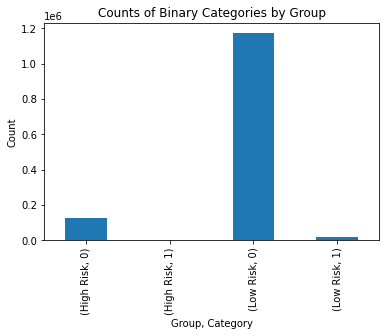

In [55]:
# Plot the counts as a bar chart
counts_aggclass.plot(kind="bar")

# Set the title and axis labels
plt.title("Counts of Binary Categories by Group")
plt.xlabel("Group, Category")
plt.ylabel("Count")

# Show the plot
plt.show()

In [56]:
df_counts_aggclass = counts_aggclass.to_frame()
df_counts_aggclass = df_counts_aggclass.rename(columns={'Pred_Default': 'count'})
df_counts_aggclass = df_counts_aggclass.reset_index()

In [57]:
counts_ethnicity = f.groupby("Ethnicity")["Pred_Default"].value_counts()
df_counts_ethnicity = counts_ethnicity.to_frame()
df_counts_ethnicity = df_counts_ethnicity.rename(columns={'Pred_Default': 'Total_Loans'})
df_counts_ethnicity = df_counts_ethnicity.reset_index()

In [58]:
default_total = f.groupby('Ethnicity')["Pred_Default"].agg(['count'])
default_total = default_total.rename(columns={'count': 'Total_Loans'})
default_total = default_total.reset_index()

In [59]:
minority_df = pd.merge(df_counts_ethnicity, default_total, on='Ethnicity')
minority_df = minority_df.rename(columns={'Total_Loans_x': 'Total_Loans_by_default','Total_Loans_y': 'Total_Loans'})
minority_df['Perct_def_by_ethnic'] = (minority_df['Total_Loans_by_default']/minority_df['Total_Loans'])*100

In [60]:
counts_aggclass_ethnic = f.groupby("agg_class")["Ethnicity"].value_counts()
df_counts_aggclass_ethnic = counts_aggclass_ethnic.to_frame()
df_counts_aggclass_ethnic = df_counts_aggclass_ethnic.rename(columns={'Ethnicity': 'count'}) 

In [61]:
counts_aggclass_ethnic_def = f.groupby(["agg_class", "Ethnicity"])["Pred_Default"].value_counts()
df_counts_aggclass_ethnic_def = counts_aggclass_ethnic_def.to_frame()
df_counts_aggclass_ethnic_def = df_counts_aggclass_ethnic_def.rename(columns={'Pred_Default': 'count'})
df_counts_aggclass_ethnic_def  = df_counts_aggclass_ethnic_def .reset_index()

In [62]:
minority_df_eth = minority_df[minority_df["Pred_Default"] == 1]
minority_df_eth = minority_df_eth[['Ethnicity', 'Perct_def_by_ethnic']]
minority_df_eth

,Ethnicity,Perct_def_by_ethnic
1,2 or more minority races,1.603982
3,American Indian or Alaska Native,1.997755
5,Asian,0.964808
7,Black or African American,1.166845
9,Ethnicity_Joint,1.752287
11,Hawaiian or Other Pacific Islander,1.291129
13,Hispanice or Latino,1.360009
15,Race Joint,1.752088
17,White,2.039321


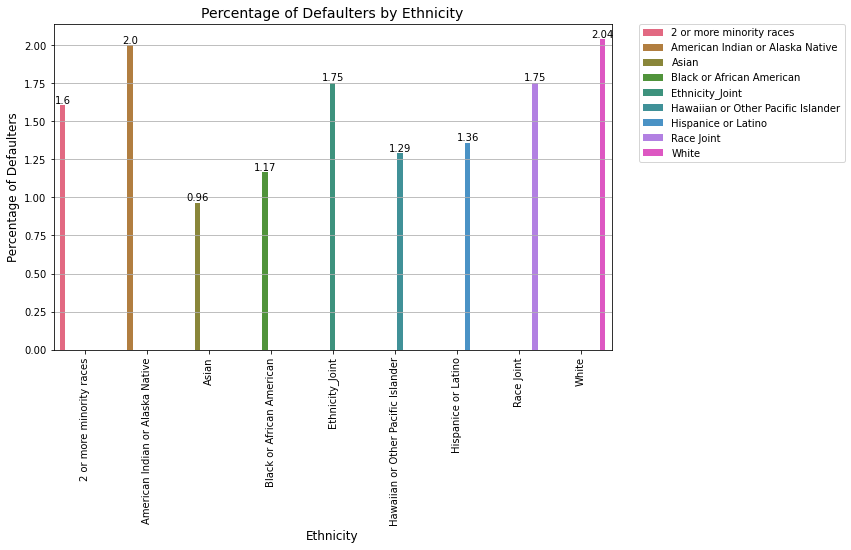

In [63]:
# Increase the size of the figure
plt.figure(figsize=(10, 6))

# Set the color palette
colors = sns.color_palette("Paired", n_colors=len(minority_df_eth["Ethnicity"].unique()))
colors = sns.husl_palette(len(minority_df_eth["Ethnicity"].unique()), l=.6, s=.9)

# Create bar plot with hue
ax = sns.barplot(x="Ethnicity", y="Perct_def_by_ethnic", hue="Ethnicity", data=minority_df_eth, palette=colors)

# Add grid lines
ax.grid(True, axis="y")

# Add value labels to the bars
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')


# Set the size of the x-axis labels and rotate them to a vertical orientation
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=90)

# Set the axis labels
ax.set_xlabel("Ethnicity", fontsize=12)
ax.set_ylabel("Percentage of Defaulters", fontsize=12)

# Set the title
ax.set_title("Percentage of Defaulters by Ethnicity", fontsize=14)

# Move the legend to the right side
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Show plot
plt.show()

In [64]:
minority_df3 = pd.merge(pd.merge(df_counts_aggclass_ethnic_def, default_total, on='Ethnicity', how='outer'), minority_df_eth, on='Ethnicity', how='outer')
minority_df3.fillna(0, inplace=True)
minority_df3 = minority_df3.rename(columns={'count': 'Total_Loans_by_default','count_y': 'Total_Loans'})

minority_df3['Perct_by_def_Risk'] = (minority_df3['Total_Loans_by_default']/minority_df3['Total_Loans'])*100
minority_df3.set_index(['agg_class','Ethnicity','Pred_Default'], inplace=True)
#minority_df3 = minority_df3.rename(columns={'count_x': 'count_by_risk_class', 'count_y': 'count_total_by_ethnicity'})
minority_df3

Total_Loans_by_default  \
agg_class Ethnicity                          Pred_Default                           
High Risk 2 or more minority races           0                                128   
                                             1                                  5   
Low Risk  2 or more minority races           0                               1651   
                                             1                                 24   
High Risk American Indian or Alaska Native   0                                348   
                                             1                                  8   
Low Risk  American Indian or Alaska Native   0                               4018   
                                             1                                 81   
High Risk Asian                              0                              12505   
                                             1                                107   
Low Risk  Asian                              0                             123503   
                                             1                               1218   
High Risk Black or African American          0                               4576   
                                             1                                 46   
Low Risk  Black or African American          0                              67420   
                                             1                                804   
High Risk Ethnicity_Joint                    0                               3876   
                                             1                                 62   
Low Risk  Ethnicity_Joint                    0                              35540   
                                             1                                641   
High Risk Hawaiian or Other Pacific Islander 0                                209   
                                             1                                  2   
Low Risk  Hawaiian or Other Pacific Islander 0                               2161   
                                             1                                 29   
High Risk Hispanice or Latino                0                              15029   
                                             1                                214   
Low Risk  Hispanice or Latino                0                             102758   
                                             1                               1410   
High Risk Race Joint                         0                               2757   
                                             1                                 58   
Low Risk  Race Joint                         0                              31000   
                                             1                                544   
High Risk White                              0                              87012   
                                             1                               1913   
Low Risk  White                              0                             803526   
                                             1                              16626   

                                                           Total_Loans  \
agg_class Ethnicity                          Pred_Default                
High Risk 2 or more minority races           0                    1808   
                                             1                    1808   
Low Risk  2 or more minority races           0                    1808   
                                             1                    1808   
High Risk American Indian or Alaska Native   0                    4455   
                                             1                    4455   
Low Risk  American Indian or Alaska Native   0                    4455   
                                             1                    4455   
High Risk Asian                              0                  137333   
              

In [65]:
High_Risk = minority_df3.loc['High Risk']
Low_Risk = minority_df3.loc['Low Risk']

In [66]:
mindf = minority_df3.reset_index()
mindf

,agg_class,Ethnicity,Pred_Default,Total_Loans_by_default,Total_Loans,Perct_def_by_ethnic,Perct_by_def_Risk
0,High Risk,2 or more minority races,0,128,1808,1.603982,7.079646
1,High Risk,2 or more minority races,1,5,1808,1.603982,0.276549
2,Low Risk,2 or more minority races,0,1651,1808,1.603982,91.316372
3,Low Risk,2 or more minority races,1,24,1808,1.603982,1.327434
4,High Risk,American Indian or Alaska Native,0,348,4455,1.997755,7.811448
5,High Risk,American Indian or Alaska Native,1,8,4455,1.997755,0.179574
6,Low Risk,American Indian or Alaska Native,0,4018,4455,1.997755,90.190797
7,Low Risk,American Indian or Alaska Native,1,81,4455,1.997755,1.818182
8,High Risk,Asian,0,12505,137333,0.964808,9.105605
9,High Risk,Asian,1,107,137333,0.964808,0.077913


In [67]:
mindf# Group the data by category and default and get the sum of Value1
grouped = mindf.groupby(['agg_class', 'Pred_Default']).agg({'Total_Loans_by_default': 'sum'})

# Compute the total sum of Value1 for each category
total = grouped.groupby('agg_class').sum()

# Compute the default rate for each default group
default_rate = grouped.div(total, level='agg_class') * 100  # multiply by 100 to convert to percentage
default_rate.columns = ['default_rate']  # rename the column to identify it in the merged dataframe

# Reset the index of the default_rate DataFrame to make the 'Category' and 'default' columns into regular columns
default_rate = default_rate.reset_index()

# Merge the grouped and default_rate DataFrames on 'Category' and 'default'
merged = pd.merge(grouped, default_rate, on=['agg_class', 'Pred_Default'])


# Group the merged DataFrame by 'Category' and 'default' and get the sum of 'Value1' and the mean of 'default_rate'
final_grouped = merged.groupby(['agg_class', 'Pred_Default']).agg({'Total_Loans_by_default': 'sum', 'default_rate': 'mean'})

print(final_grouped)
final_grouped_def  = final_grouped.reset_index()
final_grouped_def = final_grouped_def[final_grouped_def['Pred_Default']==1]
final_grouped_def

                        Total_Loans_by_default  default_rate
agg_class Pred_Default                                      
High Risk 0                             126440     98.125800
          1                               2415      1.874200
Low Risk  0                            1171577     98.208062
          1                              21377      1.791938


,agg_class,Pred_Default,Total_Loans_by_default,default_rate
1,High Risk,1,2415,1.874200
3,Low Risk,1,21377,1.791938


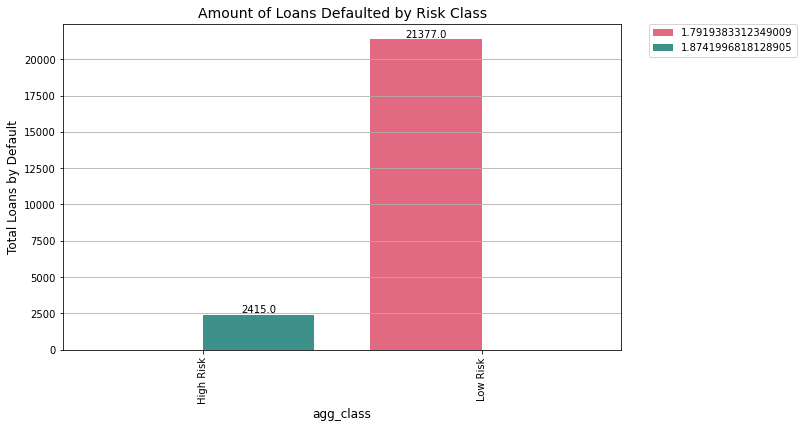

In [68]:
# Increase the size of the figure
plt.figure(figsize=(10, 6))

# Set the color palette
colors = sns.color_palette("Paired", n_colors=len(final_grouped_def["default_rate"].unique()))
colors = sns.husl_palette(len(final_grouped_def["default_rate"].unique()), l=.6, s=.9)

# Create bar plot with hue
ax = sns.barplot(x="agg_class", y="Total_Loans_by_default",  hue="default_rate", data=final_grouped_def, palette=colors)

# Add grid lines
ax.grid(True, axis="y")

# Add value labels to the bars
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')


# Set the size of the x-axis labels and rotate them to a vertical orientation
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=90)

# Set the axis labels
ax.set_xlabel("agg_class", fontsize=12)
ax.set_ylabel("Total Loans by Default", fontsize=12)

# Set the title
ax.set_title("Amount of Loans Defaulted by Risk Class", fontsize=14)

# Move the legend to the right side
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Show plot
plt.show()

In [69]:
mindf# Group the data by category and default and get the sum of Value1
grouped = mindf.groupby(['agg_class','Ethnicity', 'Pred_Default']).agg({'Total_Loans_by_default': 'sum'})

# Compute the total sum of Value1 for each category
total = grouped.groupby('agg_class').sum()

# Compute the default rate for each default group
default_rate = grouped.div(total, level='agg_class') * 100  # multiply by 100 to convert to percentage
default_rate.columns = ['default_rate']  # rename the column to identify it in the merged dataframe

# Reset the index of the default_rate DataFrame to make the 'Category' and 'default' columns into regular columns
default_rate = default_rate.reset_index()

# Merge the grouped and default_rate DataFrames on 'Category' and 'default'
merged = pd.merge(grouped, default_rate, on=['agg_class','Ethnicity', 'Pred_Default'])


# Group the merged DataFrame by 'Category' and 'default' and get the sum of 'Value1' and the mean of 'default_rate'
final_grouped = merged.groupby(['agg_class','Ethnicity', 'Pred_Default']).agg({'Total_Loans_by_default': 'sum', 'default_rate': 'mean'})

final = final_grouped.reset_index()
# set columns A and B as the multi-level index
final = final.set_index(['agg_class','Ethnicity'])
final = final[final['Pred_Default'] == 1]
final

Pred_Default  \
agg_class Ethnicity                                          
High Risk 2 or more minority races                       1   
          American Indian or Alaska Native               1   
          Asian                                          1   
          Black or African American                      1   
          Ethnicity_Joint                                1   
          Hawaiian or Other Pacific Islander             1   
          Hispanice or Latino                            1   
          Race Joint                                     1   
          White                                          1   
Low Risk  2 or more minority races                       1   
          American Indian or Alaska Native               1   
          Asian                                          1   
          Black or African American                      1   
          Ethnicity_Joint                                1   
          Hawaiian or Other Pacific Islander             1   
          Hispanice or Latino                            1   
          Race Joint                                     1   
          White                                          1   

                                              Total_Loans_by_default  \
agg_class Ethnicity                                                    
High Risk 2 or more minority races                                 5   
          American Indian or Alaska Native                         8   
          Asian                                                  107   
          Black or African American                               46   
          Ethnicity_Joint                                         62   
          Hawaiian or Other Pacific Islander                       2   
          Hispanice or Latino                                    214   
          Race Joint                                              58   
          White                                                 1913   
Low Risk  2 or more minority races                                24   
          American Indian or Alaska Native                        81   
          Asian                                                 1218   
          Black or African American                              804   
          Ethnicity_Joint                                        641   
          Hawaiian or Other Pacific Islander                      29   
          Hispanice or Latino                                   1410   
          Race Joint                                             544   
          White                                                16626   

                                              default_rate  
agg_class Ethnicity                                         
High Risk 2 or more minority races                0.003880  
          American Indian or Alaska Native        0.006209  
          Asian                                   0.083039  
          Black or African American               0.035699  
          Ethnicity_Joint                         0.048116  
          Hawaiian or Other Pacific Islander      0.001552  
          Hispanice or Latino                     0.166078  
          Race Joint                              0.045012  
          White                                   1.484614  
Low Risk  2 or more minority races                0.002012  
          American Indian or Alaska Native        0.006790  
          Asian                                   0.102099  
          Black or African American               0.067396  
          Ethnicity_Joint                         0.053732  
          Hawaiian or Other Pacific Islander      0.002431  
          Hispanice or Latino                     0.118194  
          Race Joint                              0.045601  
          White                                   1.393683

In [70]:
final = final.reset_index()
final

,agg_class,Ethnicity,Pred_Default,Total_Loans_by_default,default_rate
0,High Risk,2 or more minority races,1,5,0.003880
1,High Risk,American Indian or Alaska Native,1,8,0.006209
2,High Risk,Asian,1,107,0.083039
3,High Risk,Black or African American,1,46,0.035699
4,High Risk,Ethnicity_Joint,1,62,0.048116
5,High Risk,Hawaiian or Other Pacific Islander,1,2,0.001552
6,High Risk,Hispanice or Latino,1,214,0.166078
7,High Risk,Race Joint,1,58,0.045012
8,High Risk,White,1,1913,1.484614
9,Low Risk,2 or more minority races,1,24,0.002012


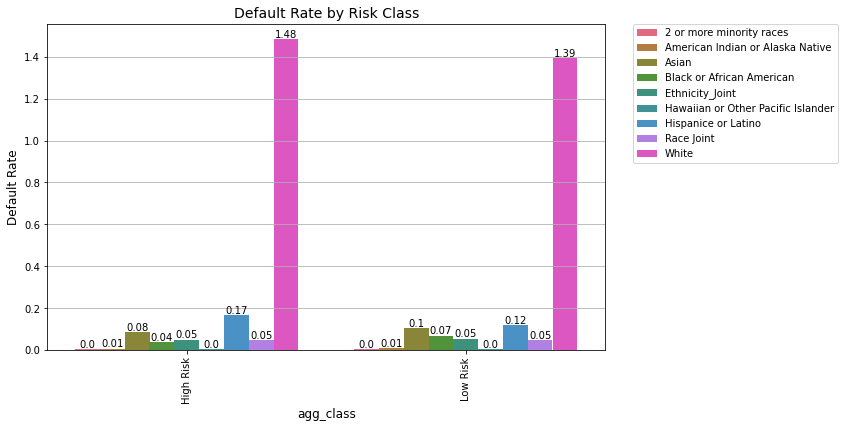

In [71]:
# Increase the size of the figure
plt.figure(figsize=(10, 6))

# Set the color palette
colors = sns.color_palette("Paired", n_colors=len(final["Ethnicity"].unique()))
colors = sns.husl_palette(len(final["Ethnicity"].unique()), l=.6, s=.9)

# Create bar plot with hue
ax = sns.barplot(x="agg_class", y="default_rate", hue="Ethnicity", data=final, palette=colors)

# Add grid lines
ax.grid(True, axis="y")

# Add value labels to the bars
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')


# Set the size of the x-axis labels and rotate them to a vertical orientation
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=90)

# Set the axis labels
ax.set_xlabel("agg_class", fontsize=12)
ax.set_ylabel("Default Rate", fontsize=12)

# Set the title
ax.set_title("Default Rate by Risk Class", fontsize=14)

# Move the legend to the right side
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Show plot
plt.show()

In [72]:
min_norm2 = final.copy()
# Choose a benchmark ethnicity (e.g. "White")
benchmark_ethnicity = "White"

# Create a copy of the dataframe
adjusted_final = min_norm2.copy()

# For each risk zone, calculate the benchmark rate and adjust the default rates for each ethnicity relative to the benchmark rate
for risk_zone in min_norm2["agg_class"].unique():
    # Calculate the benchmark rate for the current risk zone
    benchmark_rate = min_norm2[(min_norm2["Ethnicity"] == benchmark_ethnicity) & (min_norm2["agg_class"] == risk_zone)]["default_rate"].mean()

    # For each ethnicity and risk zone, divide its mean default rate by the mean default rate of the benchmark ethnicity for the same risk zone
    for ethnicity in min_norm2["Ethnicity"].unique():
        rate = min_norm2[(min_norm2["Ethnicity"] == ethnicity) & (min_norm2["agg_class"] == risk_zone)]["default_rate"].mean()
        ratio = rate / benchmark_rate
        adjusted_final.loc[(adjusted_final["Ethnicity"] == ethnicity) & (adjusted_final["agg_class"] == risk_zone), "default_rate"] *= ratio

# Print the first few rows of the updated dataframe to verify the results
adjusted_final

,agg_class,Ethnicity,Pred_Default,Total_Loans_by_default,default_rate
0,High Risk,2 or more minority races,1,5,0.000010
1,High Risk,American Indian or Alaska Native,1,8,0.000026
2,High Risk,Asian,1,107,0.004645
3,High Risk,Black or African American,1,46,0.000858
4,High Risk,Ethnicity_Joint,1,62,0.001559
5,High Risk,Hawaiian or Other Pacific Islander,1,2,0.000002
6,High Risk,Hispanice or Latino,1,214,0.018579
7,High Risk,Race Joint,1,58,0.001365
8,High Risk,White,1,1913,1.484614
9,Low Risk,2 or more minority races,1,24,0.000003


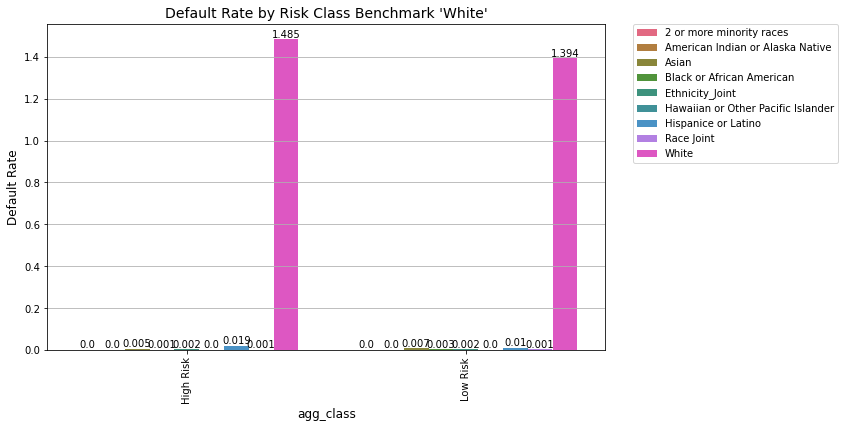

In [73]:
#adjusted_final_filtered = adjusted_final[adjusted_final['Ethnicity'] != 'White']
# Increase the size of the figure
plt.figure(figsize=(10, 6))

# Set the color palette
colors = sns.color_palette("Paired", n_colors=len(adjusted_final["Ethnicity"].unique()))
colors = sns.husl_palette(len(adjusted_final["Ethnicity"].unique()), l=.6, s=.9)


# Create bar plot with hue
ax = sns.barplot(x="agg_class", y="default_rate", hue="Ethnicity", data=adjusted_final, palette=colors)

# Add grid lines
ax.grid(True, axis="y")

# Add value labels to the bars
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 3)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')


# Set the size of the x-axis labels and rotate them to a vertical orientation
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=90)

# Set the axis labels
ax.set_xlabel("agg_class", fontsize=12)
ax.set_ylabel("Default Rate", fontsize=12)

# Set the title
ax.set_title("Default Rate by Risk Class Benchmark 'White'", fontsize=14)

# Move the legend to the right side
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Show plot
plt.show()

In [74]:
#COUNTY

In [75]:
filtered_df2 = f
counts_def_area12 = filtered_df2.groupby(["countyname",'agg_class'])["Pred_Default"].value_counts()
counts_def_area12 = counts_def_area12.to_frame()
counts_def_area12 = counts_def_area12.rename(columns={'Pred_Default': 'Total_Loans'}) 
counts_def_area12

Total_Loans
countyname       agg_class Pred_Default             
Acadia Parish LA High Risk 0                      27
                 Low Risk  0                      84
Ada County ID    Low Risk  0                     986
                           1                      39
Adair County KY  Low Risk  0                      48
...                                              ...
Yuba County CA   High Risk 1                       2
Yuma County AZ   Low Risk  0                     315
                           1                       3
Zavala County TX Low Risk  0                       7
                           1                       1

[3317 rows x 1 columns]

In [76]:
count_def_area00 = counts_def_area12.reset_index()
count_def_area00

,countyname,agg_class,Pred_Default,Total_Loans
0,Acadia Parish LA,High Risk,0,27
1,Acadia Parish LA,Low Risk,0,84
2,Ada County ID,Low Risk,0,986
3,Ada County ID,Low Risk,1,39
4,Adair County KY,Low Risk,0,48
...,...,...,...,...
3312,Yuba County CA,High Risk,1,2
3313,Yuma County AZ,Low Risk,0,315
3314,Yuma County AZ,Low Risk,1,3
3315,Zavala County TX,Low Risk,0,7


In [77]:
grouped = count_def_area00.groupby(['countyname','agg_class','Pred_Default']).agg({'Total_Loans': 'sum'})

# Compute the total sum of Value1 for each category
total = grouped.groupby('countyname').sum()

# Compute the default rate for each default group
default_rate = grouped.div(total, level='countyname') * 100  # multiply by 100 to convert to percentage
default_rate.columns = ['default_rate_by_county']  # rename the column to identify it in the merged dataframe

# Reset the index of the default_rate DataFrame to make the 'Category' and 'default' columns into regular columns
default_rate = default_rate.reset_index()

# Merge the grouped and default_rate DataFrames on 'Category' and 'default'
merged = pd.merge(grouped, default_rate, on=['countyname','agg_class','Pred_Default'])


# Group the merged DataFrame by 'Category' and 'default' and get the sum of 'Value1' and the mean of 'default_rate'
final_grouped = merged.groupby(['countyname','agg_class','Pred_Default']).agg({'Total_Loans': 'sum', 'default_rate_by_county': 'mean'})

final = final_grouped.reset_index()
# set columns A and B as the multi-level index
final = final.set_index(['countyname','agg_class'])
final = final[final['Pred_Default'] == 1]
final

,,Pred_Default,Total_Loans,default_rate_by_county
countyname,agg_class,,,
Ada County ID,Low Risk,1,39,3.804878
Adair County KY,Low Risk,1,1,2.040816
Adair County OK,Low Risk,1,3,2.013423
Adams County CO,Low Risk,1,48,1.460298
Adams County PA,Low Risk,1,3,4.545455
...,...,...,...,...
York County PA,Low Risk,1,87,3.664701
York County SC,Low Risk,1,32,1.087695
Yuba County CA,High Risk,1,2,0.809717


In [78]:
final = final.reset_index()
final

,countyname,agg_class,Pred_Default,Total_Loans,default_rate_by_county
0,Ada County ID,Low Risk,1,39,3.804878
1,Adair County KY,Low Risk,1,1,2.040816
2,Adair County OK,Low Risk,1,3,2.013423
3,Adams County CO,Low Risk,1,48,1.460298
4,Adams County PA,Low Risk,1,3,4.545455
...,...,...,...,...,...
1511,York County PA,Low Risk,1,87,3.664701
1512,York County SC,Low Risk,1,32,1.087695
1513,Yuba County CA,High Risk,1,2,0.809717
1514,Yuma County AZ,Low Risk,1,3,0.943396


In [79]:
mean_value = final['default_rate_by_county'].mean()
mean_value
final['default_rate_by_county'] = final['default_rate_by_county'] / mean_value
final

,countyname,agg_class,Pred_Default,Total_Loans,default_rate_by_county
0,Ada County ID,Low Risk,1,39,1.544770
1,Adair County KY,Low Risk,1,1,0.828566
2,Adair County OK,Low Risk,1,3,0.817444
3,Adams County CO,Low Risk,1,48,0.592877
4,Adams County PA,Low Risk,1,3,1.845442
...,...,...,...,...,...
1511,York County PA,Low Risk,1,87,1.487858
1512,York County SC,Low Risk,1,32,0.441601
1513,Yuba County CA,High Risk,1,2,0.328743
1514,Yuma County AZ,Low Risk,1,3,0.383016


In [80]:
# sort the dataframe in ascending order based on col1 and col2
df_final = final.sort_values(by=['Total_Loans', 'default_rate_by_county'], ascending=False)
top_10 = df_final.head(15)
top_10

,countyname,agg_class,Pred_Default,Total_Loans,default_rate_by_county
845,Maricopa County AZ,Low Risk,1,883,0.947699
696,King County WA,Low Risk,1,572,0.492744
810,Los Angeles County CA,Low Risk,1,531,0.550368
959,Multnomah County OR,Low Risk,1,489,1.173569
1194,San Diego County CA,Low Risk,1,447,0.734353
1024,Orange County CA,Low Risk,1,446,0.688576
10,Alameda County CA,Low Risk,1,386,0.539652
1160,Riverside County CA,Low Risk,1,384,0.599950
241,Clackamas County OR,Low Risk,1,309,1.031517
249,Clark County NV,Low Risk,1,292,0.618033


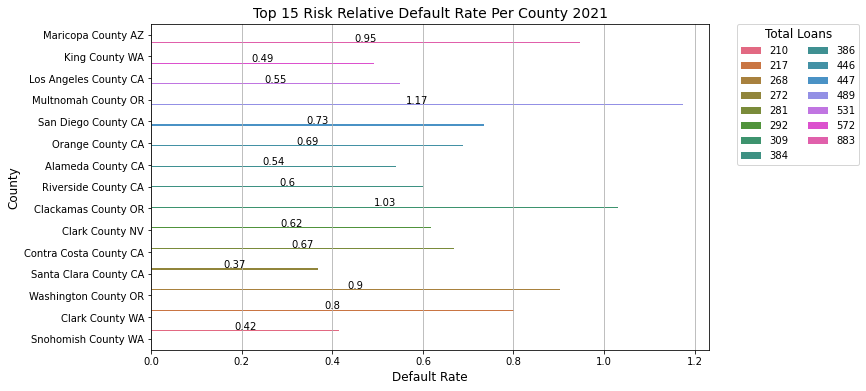

In [81]:
# Increase the size of the figure
plt.figure(figsize=(10, 6))

# Set the color palette
colors = sns.color_palette("Paired", n_colors=len(top_10["Total_Loans"].unique()))
colors = sns.husl_palette(len(top_10["Total_Loans"].unique()), l=.6, s=.9)

# Create horizontal bar plot with hue
ax = sns.barplot(y="countyname", x="default_rate_by_county", hue="Total_Loans", data=top_10, palette=colors)

# Add grid lines
ax.grid(True, axis="x")

# Add value labels to the bars
for p in ax.patches:
    ax.annotate(f"{round(p.get_width(), 2)}", (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set the size of the y-axis labels
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)

# Set the axis labels
ax.set_xlabel("Default Rate", fontsize=12)
ax.set_ylabel("County", fontsize=12)

# Set the title
ax.set_title("Top 15 Risk Relative Default Rate Per County 2021", fontsize=14)

# Move the legend to the right side and set the title
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Total Loans", title_fontsize=12, ncol=2)

# Show plot
plt.show()

In [82]:
filtered_df2 = f

counts_def_area12 = filtered_df2.groupby(["countyname",'agg_class', 'Ethnicity'])["Pred_Default"].value_counts()
counts_def_area12 = counts_def_area12.to_frame()
counts_def_area12 = counts_def_area12.rename(columns={'Pred_Default': 'Total_Loans'}) 
counts_def_area12

Total_Loans
countyname       agg_class Ethnicity                        Pred_Default             
Acadia Parish LA High Risk White                            0                      27
                 Low Risk  American Indian or Alaska Native 0                       2
                           Asian                            0                       1
                           Black or African American        0                       6
                           Race Joint                       0                       3
...                                                                               ...
Yuma County AZ   Low Risk  Race Joint                       0                       2
                           White                            0                     102
                                                            1                       1
Zavala County TX Low Risk  Hispanice or Latino              0                       7
                                                            1                       1

[12765 rows x 1 columns]

In [83]:
count_def_area00 = counts_def_area12.reset_index()
count_def_area00

,countyname,agg_class,Ethnicity,Pred_Default,Total_Loans
0,Acadia Parish LA,High Risk,White,0,27
1,Acadia Parish LA,Low Risk,American Indian or Alaska Native,0,2
2,Acadia Parish LA,Low Risk,Asian,0,1
3,Acadia Parish LA,Low Risk,Black or African American,0,6
4,Acadia Parish LA,Low Risk,Race Joint,0,3
...,...,...,...,...,...
12760,Yuma County AZ,Low Risk,Race Joint,0,2
12761,Yuma County AZ,Low Risk,White,0,102
12762,Yuma County AZ,Low Risk,White,1,1
12763,Zavala County TX,Low Risk,Hispanice or Latino,0,7


In [84]:
grouped = count_def_area00.groupby(['countyname','agg_class','Ethnicity','Pred_Default']).agg({'Total_Loans': 'sum'})

# Compute the total sum of Value1 for each category
total = grouped.groupby('countyname').sum()

# Compute the default rate for each default group
default_rate = grouped.div(total, level='countyname') * 100  # multiply by 100 to convert to percentage
default_rate.columns = ['default_rate_by_county']  # rename the column to identify it in the merged dataframe

# Reset the index of the default_rate DataFrame to make the 'Category' and 'default' columns into regular columns
default_rate = default_rate.reset_index()

# Merge the grouped and default_rate DataFrames on 'Category' and 'default'
merged = pd.merge(grouped, default_rate, on=['countyname','agg_class','Ethnicity','Pred_Default'])


# Group the merged DataFrame by 'Category' and 'default' and get the sum of 'Value1' and the mean of 'default_rate'
final_grouped = merged.groupby(['countyname','agg_class','Ethnicity','Pred_Default']).agg({'Total_Loans': 'sum', 'default_rate_by_county': 'mean'})

final = final_grouped.reset_index()
# set columns A and B as the multi-level index
final = final.set_index(['countyname','agg_class','Ethnicity'])
final = final[final['Pred_Default'] == 1]
final

Pred_Default  Total_Loans  \
countyname       agg_class Ethnicity                                        
Ada County ID    Low Risk  Hispanice or Latino             1            1   
                           White                           1           38   
Adair County KY  Low Risk  White                           1            1   
Adair County OK  Low Risk  Race Joint                      1            1   
                           White                           1            2   
...                                                      ...          ...   
York County SC   Low Risk  White                           1           26   
Yuba County CA   High Risk White                           1            2   
Yuma County AZ   Low Risk  Hispanice or Latino             1            2   
                           White                           1            1   
Zavala County TX Low Risk  Hispanice or Latino             1            1   

                                                default_rate_by_county  
countyname       agg_class Ethnicity                                    
Ada County ID    Low Risk  Hispanice or Latino                0.097561  
                           White                              3.707317  
Adair County KY  Low Risk  White                              2.040816  
Adair County OK  Low Risk  Race Joint                         0.671141  
                           White                              1.342282  
...                                                                ...  
York County SC   Low Risk  White                              0.883753  
Yuba County CA   High Risk White                              0.809717  
Yuma County AZ   Low Risk  Hispanice or Latino                0.628931  
                           White                              0.314465  
Zavala County TX Low Risk  Hispanice or Latino               12.500000  

[2967 rows x 3 columns]

In [85]:
final = final.reset_index()
mean_value = final['default_rate_by_county'].mean()
mean_value
final['default_rate_by_county'] = final['default_rate_by_county'] / mean_value
final

,countyname,agg_class,Ethnicity,Pred_Default,Total_Loans,default_rate_by_county
0,Ada County ID,Low Risk,Hispanice or Latino,1,1,0.077521
1,Ada County ID,Low Risk,White,1,38,2.945785
2,Adair County KY,Low Risk,White,1,1,1.621606
3,Adair County OK,Low Risk,Race Joint,1,1,0.533280
4,Adair County OK,Low Risk,White,1,2,1.066559
...,...,...,...,...,...,...
2962,York County SC,Low Risk,White,1,26,0.702218
2963,Yuba County CA,High Risk,White,1,2,0.643390
2964,Yuma County AZ,Low Risk,Hispanice or Latino,1,2,0.499740
2965,Yuma County AZ,Low Risk,White,1,1,0.249870


In [86]:
df_final = final.reset_index()
# sort the dataframe in ascending order based on col1 and col2
df_final = df_final.sort_values(by=['Total_Loans', 'default_rate_by_county'], ascending=False)
top_10 = df_final.head(15)
top_10

,index,countyname,agg_class,Ethnicity,Pred_Default,Total_Loans,default_rate_by_county
1613,1613,Maricopa County AZ,Low Risk,White,1,719,1.510278
1335,1335,King County WA,Low Risk,White,1,419,0.706412
1826,1826,Multnomah County OR,Low Risk,White,1,409,1.921062
1551,1551,Los Angeles County CA,Low Risk,White,1,322,0.653180
2329,2329,San Diego County CA,Low Risk,White,1,308,0.990300
1956,1956,Orange County CA,Low Risk,White,1,303,0.915541
454,454,Clackamas County OR,Low Risk,White,1,266,1.737873
2237,2237,Riverside County CA,Low Risk,White,1,255,0.779726
2814,2814,Washington County OR,Low Risk,White,1,220,1.451300
472,472,Clark County NV,Low Risk,White,1,194,0.803617


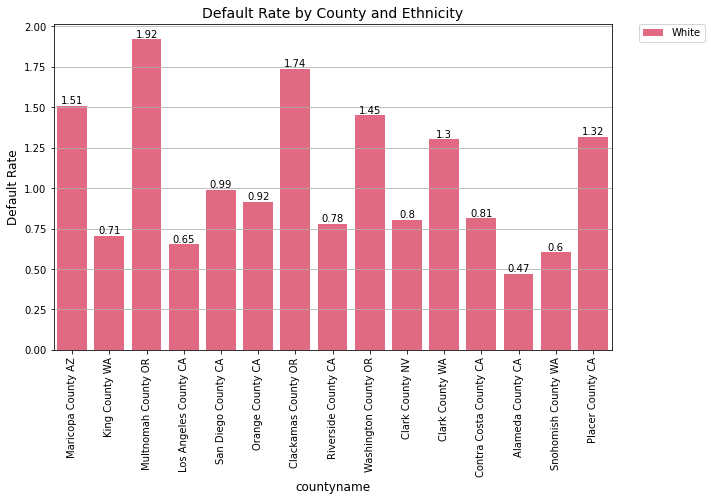

In [87]:
# Increase the size of the figure
plt.figure(figsize=(10, 6))

# Set the color palette
colors = sns.color_palette("Paired", n_colors=len(top_10["Ethnicity"].unique()))
colors = sns.husl_palette(len(top_10["Ethnicity"].unique()), l=.6, s=.9)

# Create bar plot with hue
ax = sns.barplot(x="countyname", y="default_rate_by_county", hue="Ethnicity", data=top_10, palette=colors)

# Add grid lines
ax.grid(True, axis="y")

# Add value labels to the bars
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')


# Set the size of the x-axis labels and rotate them to a vertical orientation
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=90)

# Set the axis labels
ax.set_xlabel("countyname", fontsize=12)
ax.set_ylabel("Default Rate", fontsize=12)

# Set the title
ax.set_title("Default Rate by County and Ethnicity", fontsize=14)

# Move the legend to the right side
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Show plot
plt.show()

In [88]:
minor = count_def_area00.copy()
minor

,countyname,agg_class,Ethnicity,Pred_Default,Total_Loans
0,Acadia Parish LA,High Risk,White,0,27
1,Acadia Parish LA,Low Risk,American Indian or Alaska Native,0,2
2,Acadia Parish LA,Low Risk,Asian,0,1
3,Acadia Parish LA,Low Risk,Black or African American,0,6
4,Acadia Parish LA,Low Risk,Race Joint,0,3
...,...,...,...,...,...
12760,Yuma County AZ,Low Risk,Race Joint,0,2
12761,Yuma County AZ,Low Risk,White,0,102
12762,Yuma County AZ,Low Risk,White,1,1
12763,Zavala County TX,Low Risk,Hispanice or Latino,0,7


In [89]:
# create new column "C" with 0 values
minor['Minority'] = 0
minor['Non_Minority'] = 0

# set "C" to 1 where either "A" is 1 or "B" is 1
minor.loc[(minor['Ethnicity'] == 'American Indian or Alaska Native') | (minor['Ethnicity'] == 'Asian')
        | (minor['Ethnicity'] == 'Black or African American') | (minor['Ethnicity'] == 'Ethnicity_Joint') 
        | (minor['Ethnicity'] == 'Hawaiian or Other Pacific Islander') | (minor['Ethnicity'] == 'Hispanice or Latino')
        |(minor['Ethnicity'] == 'Race Joint') | (minor['Ethnicity'] == '2 or more minority races'),'Minority'] = 1
minor.loc[(minor['Ethnicity'] == 'White'),'Non_Minority'] = 1
#minor_df = minor[['countyname','agg_class','Pred_Default', 'Minority','Non_Minority']]
#chi_df = chi_df[chi_df['Non_Minority']== 0]
minor = minor.drop(['Ethnicity', 'Non_Minority'], axis=1)

minor

,countyname,agg_class,Pred_Default,Total_Loans,Minority
0,Acadia Parish LA,High Risk,0,27,0
1,Acadia Parish LA,Low Risk,0,2,1
2,Acadia Parish LA,Low Risk,0,1,1
3,Acadia Parish LA,Low Risk,0,6,1
4,Acadia Parish LA,Low Risk,0,3,1
...,...,...,...,...,...
12760,Yuma County AZ,Low Risk,0,2,1
12761,Yuma County AZ,Low Risk,0,102,0
12762,Yuma County AZ,Low Risk,1,1,0
12763,Zavala County TX,Low Risk,0,7,1


In [90]:
grouped = minor.groupby(['countyname','agg_class','Minority','Pred_Default']).agg({'Total_Loans': 'sum'})

# Compute the total sum of Value1 for each category
total = grouped.groupby('countyname').sum()

# Compute the default rate for each default group
default_rate = grouped.div(total, level='countyname') * 100  # multiply by 100 to convert to percentage
default_rate.columns = ['default_rate_by_county']  # rename the column to identify it in the merged dataframe

# Reset the index of the default_rate DataFrame to make the 'Category' and 'default' columns into regular columns
default_rate = default_rate.reset_index()

# Merge the grouped and default_rate DataFrames on 'Category' and 'default'
merged = pd.merge(grouped, default_rate, on=['countyname','agg_class','Minority','Pred_Default'])


# Group the merged DataFrame by 'Category' and 'default' and get the sum of 'Value1' and the mean of 'default_rate'
final_grouped = merged.groupby(['countyname','agg_class','Minority','Pred_Default']).agg({'Total_Loans': 'sum', 'default_rate_by_county': 'mean'})

final = final_grouped.reset_index()
# set columns A and B as the multi-level index
final = final.set_index(['countyname','agg_class','Minority'])
final = final[final['Pred_Default'] == 1]
final

Pred_Default  Total_Loans  \
countyname       agg_class Minority                              
Ada County ID    Low Risk  0                    1           38   
                           1                    1            1   
Adair County KY  Low Risk  0                    1            1   
Adair County OK  Low Risk  0                    1            2   
                           1                    1            1   
...                                           ...          ...   
York County SC   Low Risk  1                    1            6   
Yuba County CA   High Risk 0                    1            2   
Yuma County AZ   Low Risk  0                    1            1   
                           1                    1            2   
Zavala County TX Low Risk  1                    1            1   

                                     default_rate_by_county  
countyname       agg_class Minority                          
Ada County ID    Low Risk  0                       3.707317  
                           1                       0.097561  
Adair County KY  Low Risk  0                       2.040816  
Adair County OK  Low Risk  0                       1.342282  
                           1                       0.671141  
...                                                     ...  
York County SC   Low Risk  1                       0.203943  
Yuba County CA   High Risk 0                       0.809717  
Yuma County AZ   Low Risk  0                       0.314465  
                           1                       0.628931  
Zavala County TX Low Risk  1                      12.500000  

[2184 rows x 3 columns]

In [91]:
final = final.reset_index()
mean_value = final['default_rate_by_county'].mean()
mean_value
final['default_rate_by_county'] = final['default_rate_by_county'] / mean_value
final

,countyname,agg_class,Minority,Pred_Default,Total_Loans,default_rate_by_county
0,Ada County ID,Low Risk,0,1,38,2.168384
1,Ada County ID,Low Risk,1,1,1,0.057063
2,Adair County KY,Low Risk,0,1,1,1.193659
3,Adair County OK,Low Risk,0,1,2,0.785091
4,Adair County OK,Low Risk,1,1,1,0.392546
...,...,...,...,...,...,...
2179,York County SC,Low Risk,1,1,6,0.119285
2180,Yuba County CA,High Risk,0,1,2,0.473598
2181,Yuma County AZ,Low Risk,0,1,1,0.183929
2182,Yuma County AZ,Low Risk,1,1,2,0.367857


In [92]:
df_final = final.reset_index()
# sort the dataframe in ascending order based on col1 and col2
df_final = df_final.sort_values(by=['Total_Loans', 'default_rate_by_county'], ascending=False)
top_10 = df_final.head(15)
top_10

,index,countyname,agg_class,Minority,Pred_Default,Total_Loans,default_rate_by_county
1207,1207,Maricopa County AZ,Low Risk,0,1,719,1.111711
999,999,King County WA,Low Risk,0,1,419,0.519988
1367,1367,Multnomah County OR,Low Risk,0,1,409,1.414088
1159,1159,Los Angeles County CA,Low Risk,0,1,322,0.480804
1715,1715,San Diego County CA,Low Risk,0,1,308,0.728957
1462,1462,Orange County CA,Low Risk,0,1,303,0.673927
349,349,Clackamas County OR,Low Risk,0,1,266,1.279243
1660,1660,Riverside County CA,Low Risk,0,1,255,0.573954
2063,2063,Washington County OR,Low Risk,0,1,220,1.068298
17,17,Alameda County CA,Low Risk,1,1,214,0.431016


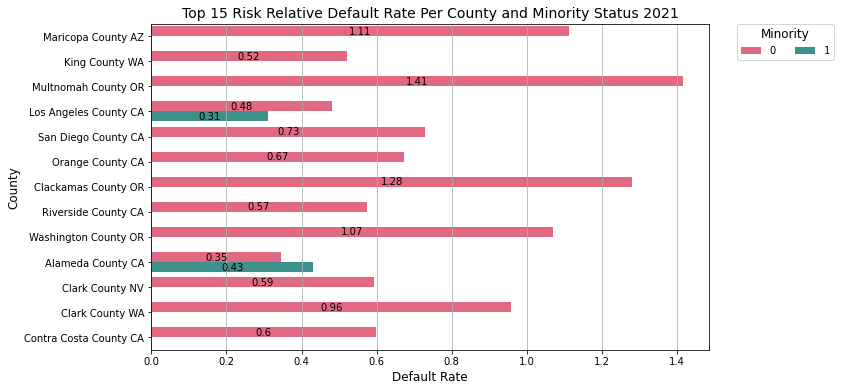

In [93]:
# Increase the size of the figure
plt.figure(figsize=(10, 6))

# Set the color palette
colors = sns.color_palette("Paired", n_colors=len(top_10["Minority"].unique()))
colors = sns.husl_palette(len(top_10["Minority"].unique()), l=.6, s=.9)

# Create horizontal bar plot with hue
ax = sns.barplot(y="countyname", x="default_rate_by_county", hue="Minority", data=top_10, palette=colors)

# Add grid lines
ax.grid(True, axis="x")

# Add value labels to the bars
for p in ax.patches:
    ax.annotate(f"{round(p.get_width(), 2)}", (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set the size of the y-axis labels
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)

# Set the axis labels
ax.set_xlabel("Default Rate", fontsize=12)
ax.set_ylabel("County", fontsize=12)

# Set the title
ax.set_title("Top 15 Risk Relative Default Rate Per County and Minority Status 2021", fontsize=14)

# Move the legend to the right side and set the title
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Minority", title_fontsize=12, ncol=2)

# Show plot
plt.show()

In [94]:
grouped = minor.groupby(['agg_class','Minority','Pred_Default']).agg({'Total_Loans': 'sum'})

# Compute the total sum of Value1 for each category
total = grouped.groupby('agg_class').sum()

# Compute the default rate for each default group
default_rate = grouped.div(total, level='agg_class') * 100  # multiply by 100 to convert to percentage
default_rate.columns = ['default_rate_by_aggclass']  # rename the column to identify it in the merged dataframe

# Reset the index of the default_rate DataFrame to make the 'Category' and 'default' columns into regular columns
default_rate = default_rate.reset_index()

# Merge the grouped and default_rate DataFrames on 'Category' and 'default'
merged = pd.merge(grouped, default_rate, on=['agg_class','Minority','Pred_Default'])


# Group the merged DataFrame by 'Category' and 'default' and get the sum of 'Value1' and the mean of 'default_rate'
final_grouped = merged.groupby(['agg_class','Minority','Pred_Default']).agg({'Total_Loans': 'sum', 'default_rate_by_aggclass': 'mean'})

final = final_grouped.reset_index()
# set columns A and B as the multi-level index
final = final.set_index(['agg_class','Minority'])
final = final[final['Pred_Default'] == 1]
final

Pred_Default  Total_Loans  default_rate_by_aggclass
agg_class Minority                                                     
High Risk 0                    1         1913                  1.484614
          1                    1          502                  0.389585
Low Risk  0                    1        16626                  1.393683
          1                    1         4751                  0.398255

In [95]:
final = final.reset_index()

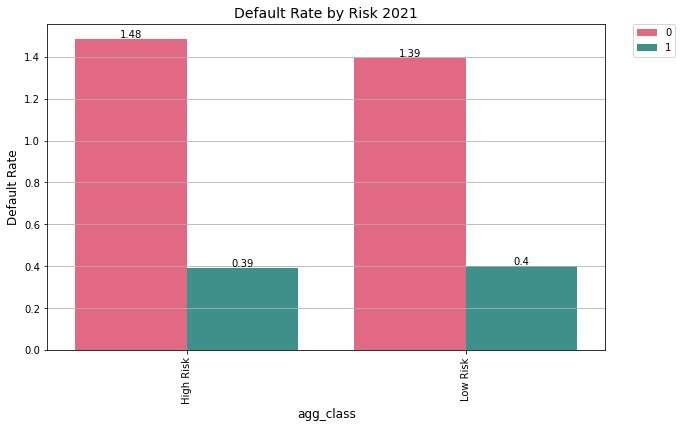

In [96]:
# Increase the size of the figure
plt.figure(figsize=(10, 6))

# Set the color palette
colors = sns.color_palette("Paired", n_colors=len(final["Minority"].unique()))
colors = sns.husl_palette(len(final["Minority"].unique()), l=.6, s=.9)

# Create bar plot with hue
ax = sns.barplot(x="agg_class", y="default_rate_by_aggclass", hue="Minority", data=final, palette=colors)

# Add grid lines
ax.grid(True, axis="y")

# Add value labels to the bars
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')


# Set the size of the x-axis labels and rotate them to a vertical orientation
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=90)

# Set the axis labels
ax.set_xlabel("agg_class", fontsize=12)
ax.set_ylabel("Default Rate", fontsize=12)

# Set the title
ax.set_title("Default Rate by Risk 2021", fontsize=14)

# Move the legend to the right side
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Show plot
plt.show()

In [97]:
table = mindf[mindf['Pred_Default']==1]
table

,agg_class,Ethnicity,Pred_Default,Total_Loans_by_default,Total_Loans,Perct_def_by_ethnic,Perct_by_def_Risk
1,High Risk,2 or more minority races,1,5,1808,1.603982,0.276549
3,Low Risk,2 or more minority races,1,24,1808,1.603982,1.327434
5,High Risk,American Indian or Alaska Native,1,8,4455,1.997755,0.179574
7,Low Risk,American Indian or Alaska Native,1,81,4455,1.997755,1.818182
9,High Risk,Asian,1,107,137333,0.964808,0.077913
11,Low Risk,Asian,1,1218,137333,0.964808,0.886895
13,High Risk,Black or African American,1,46,72846,1.166845,0.063147
15,Low Risk,Black or African American,1,804,72846,1.166845,1.103698
17,High Risk,Ethnicity_Joint,1,62,40119,1.752287,0.154540
19,Low Risk,Ethnicity_Joint,1,641,40119,1.752287,1.597747


In [98]:
loans_w

,census_tract,agg_ff,agg_class,countyname,loan_amount,loan_to_value_ratio,debt_to_income_ratio,interest_rate,total_loan_costs,origination_charges,...,applicant_age_25-34,applicant_age_35-44,applicant_age_45-54,applicant_age_55-64,applicant_age_65-74,applicant_age_<25,applicant_age_>74,loan_purpose_other,FICO,Pred_Default
0,3.200301e+10,1.45,Low Risk,Clark County NV,235000.0,95.000,3,3.750,5021.30,1495.00,...,0,1,0,0,0,0,0,0,680,0
1,3.200301e+10,1.45,Low Risk,Clark County NV,335000.0,66.400,1,3.750,4138.50,2355.00,...,0,1,0,0,0,0,0,0,680,0
2,3.200301e+10,1.45,Low Risk,Clark County NV,305000.0,75.000,2,2.500,4754.00,1965.00,...,0,0,0,0,1,0,0,0,680,0
3,3.200301e+10,1.45,Low Risk,Clark County NV,285000.0,90.000,1,3.625,10488.25,7495.25,...,0,0,1,0,0,0,0,0,680,0
4,3.200301e+10,1.45,Low Risk,Clark County NV,235000.0,95.000,2,2.990,9133.30,5905.00,...,0,0,0,0,0,1,0,0,680,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321804,3.903515e+10,1.16,Low Risk,Cuyahoga County OH,75000.0,79.596,2,3.750,4079.48,2324.48,...,0,0,1,0,0,0,0,0,680,0
1321805,3.903515e+10,1.16,Low Risk,Cuyahoga County OH,115000.0,80.000,2,2.875,4997.07,1533.37,...,0,1,0,0,0,0,0,0,680,0
1321806,3.903515e+10,1.16,Low Risk,Cuyahoga County OH,75000.0,70.870,2,2.490,6643.36,3187.86,...,0,0,1,0,0,0,0,0,680,0
1321807,3.903515e+10,1.16,Low Risk,Cuyahoga County OH,115000.0,71.850,2,2.625,9575.38,4137.68,...,0,0,0,0,1,0,0,0,680,0


In [99]:
chi = loans_w.copy()
chi

,census_tract,agg_ff,agg_class,countyname,loan_amount,loan_to_value_ratio,debt_to_income_ratio,interest_rate,total_loan_costs,origination_charges,...,applicant_age_25-34,applicant_age_35-44,applicant_age_45-54,applicant_age_55-64,applicant_age_65-74,applicant_age_<25,applicant_age_>74,loan_purpose_other,FICO,Pred_Default
0,3.200301e+10,1.45,Low Risk,Clark County NV,235000.0,95.000,3,3.750,5021.30,1495.00,...,0,1,0,0,0,0,0,0,680,0
1,3.200301e+10,1.45,Low Risk,Clark County NV,335000.0,66.400,1,3.750,4138.50,2355.00,...,0,1,0,0,0,0,0,0,680,0
2,3.200301e+10,1.45,Low Risk,Clark County NV,305000.0,75.000,2,2.500,4754.00,1965.00,...,0,0,0,0,1,0,0,0,680,0
3,3.200301e+10,1.45,Low Risk,Clark County NV,285000.0,90.000,1,3.625,10488.25,7495.25,...,0,0,1,0,0,0,0,0,680,0
4,3.200301e+10,1.45,Low Risk,Clark County NV,235000.0,95.000,2,2.990,9133.30,5905.00,...,0,0,0,0,0,1,0,0,680,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321804,3.903515e+10,1.16,Low Risk,Cuyahoga County OH,75000.0,79.596,2,3.750,4079.48,2324.48,...,0,0,1,0,0,0,0,0,680,0
1321805,3.903515e+10,1.16,Low Risk,Cuyahoga County OH,115000.0,80.000,2,2.875,4997.07,1533.37,...,0,1,0,0,0,0,0,0,680,0
1321806,3.903515e+10,1.16,Low Risk,Cuyahoga County OH,75000.0,70.870,2,2.490,6643.36,3187.86,...,0,0,1,0,0,0,0,0,680,0
1321807,3.903515e+10,1.16,Low Risk,Cuyahoga County OH,115000.0,71.850,2,2.625,9575.38,4137.68,...,0,0,0,0,1,0,0,0,680,0


In [100]:
# create new column "C" with 0 values
chi['Minority'] = 0
chi['Non_Minority'] = 0

# set "C" to 1 where either "A" is 1 or "B" is 1
chi.loc[(chi['derived_ethnicity_Hispanic or Latino'] == 1) | (chi['derived_ethnicity_Joint'] == 1)
        | (chi['derived_race_2 or more minority races'] == 1) | (chi['derived_race_American Indian or Alaska Native'] == 1) 
        | (chi['derived_race_Asian'] == 1) | (chi['derived_race_Black or African American'] == 1)
        |(chi['derived_race_Joint'] == 1) | (chi['derived_race_Native Hawaiian or Other Pacific Islander'] == 1),'Minority'] = 1
chi.loc[(chi['derived_race_White'] == 1),'Non_Minority'] = 1
chi_df = chi[['agg_class','Pred_Default', 'Minority','Non_Minority']]
#chi_df = chi_df[chi_df['Non_Minority']== 0]
chi_df

,agg_class,Pred_Default,Minority,Non_Minority
0,Low Risk,0,1,0
1,Low Risk,0,0,1
2,Low Risk,0,0,1
3,Low Risk,0,0,1
4,Low Risk,0,0,1
...,...,...,...,...
1321804,Low Risk,0,1,0
1321805,Low Risk,0,0,1
1321806,Low Risk,0,1,0
1321807,Low Risk,0,1,0


In [101]:
from scipy.stats import chi2_contingency
# create a contingency table
contingency_table = pd.crosstab(chi_df['Pred_Default'], chi_df['Minority'])
contingency_table.fillna(0, inplace=True)
contingency_table

Minority,0,1
Pred_Default,,
0,890538,407479
1,18539,5253


In [102]:
# run chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print('Chi-square statistic:', chi2)
print('P-value:', p_value)
print('Degrees of freedom:', dof)
print('Expected frequencies:', expected)

Chi-square statistic: 943.2880913850079
P-value: 3.817264274651282e-207
Degrees of freedom: 1
Expected frequencies: [[892714.00051672 405302.99948328]
 [ 16362.99948328   7429.00051672]]


In [103]:
total_minority = pd.DataFrame([['Pred Default vs Minority', chi2, p_value, dof]],
               columns = ['Test','Chi-square statistic', 'P-value', 'Degrees of freedom'])
total_minority

,Test,Chi-square statistic,P-value,Degrees of freedom
0,Pred Default vs Minority,943.288091,3.817264e-207,1


In [104]:
from scipy.stats import chi2_contingency
# create a contingency table
contingency_table = pd.crosstab(chi_df['Pred_Default'], chi_df['agg_class'])
contingency_table.fillna(0, inplace=True)
contingency_table

agg_class,High Risk,Low Risk
Pred_Default,,
0,126440,1171577
1,2415,21377


In [105]:
# run chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print('Chi-square statistic:', chi2)
print('P-value:', p_value)
print('Degrees of freedom:', dof)
print('Expected frequencies:', expected)

Chi-square statistic: 4.405775454340911
P-value: 0.03581743716012883
Degrees of freedom: 1
Expected frequencies: [[ 126535.66478591 1171481.33521409]
 [   2319.33521409   21472.66478591]]


In [106]:
pred_vs_risk = pd.DataFrame([['Pred Default vs Risk', chi2, p_value, dof]],
               columns = ['Test','Chi-square statistic', 'P-value', 'Degrees of freedom'])
pred_vs_risk 

,Test,Chi-square statistic,P-value,Degrees of freedom
0,Pred Default vs Risk,4.405775,0.035817,1


In [107]:
chi_df_lowrisk = chi_df[chi_df['agg_class']== 'Low Risk']
chi_df_lowrisk

,agg_class,Pred_Default,Minority,Non_Minority
0,Low Risk,0,1,0
1,Low Risk,0,0,1
2,Low Risk,0,0,1
3,Low Risk,0,0,1
4,Low Risk,0,0,1
...,...,...,...,...
1321804,Low Risk,0,1,0
1321805,Low Risk,0,0,1
1321806,Low Risk,0,1,0
1321807,Low Risk,0,1,0


In [108]:
from scipy.stats import chi2_contingency
# create a contingency table
contingency_table = pd.crosstab(chi_df_lowrisk['Pred_Default'], chi_df_lowrisk['Minority'])
contingency_table.fillna(0, inplace=True)
print(contingency_table)

# run chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print('Chi-square statistic:', chi2)
print('P-value:', p_value)
print('Degrees of freedom:', dof)
print('Expected frequencies:', expected)

Minority           0       1
Pred_Default                
0             803526  368051
1              16626    4751
Chi-square statistic: 824.8827267083185
P-value: 2.099959104600823e-181
Degrees of freedom: 1
Expected frequencies: [[805455.38193761 366121.61806239]
 [ 14696.61806239   6680.38193761]]


In [109]:
pred_vs_lowrisk = pd.DataFrame([['Pred Default vs Low Risk Minority', chi2, p_value, dof]],
               columns = ['Test','Chi-square statistic', 'P-value', 'Degrees of freedom'])
pred_vs_lowrisk 

,Test,Chi-square statistic,P-value,Degrees of freedom
0,Pred Default vs Low Risk Minority,824.882727,2.099959e-181,1


In [110]:
chi_df_highrisk = chi_df[chi_df['agg_class'] == 'High Risk']
chi_df_highrisk

,agg_class,Pred_Default,Minority,Non_Minority
277,High Risk,0,0,1
278,High Risk,0,0,1
279,High Risk,0,1,0
280,High Risk,0,0,1
281,High Risk,0,1,0
...,...,...,...,...
1318249,High Risk,0,0,1
1318250,High Risk,0,0,1
1318251,High Risk,0,1,1
1318252,High Risk,1,1,0


In [111]:
from scipy.stats import chi2_contingency
# create a contingency table
contingency_table = pd.crosstab(chi_df_highrisk['Pred_Default'], chi_df_highrisk['Minority'])
contingency_table.fillna(0, inplace=True)
print(contingency_table)

# run chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print('Chi-square statistic:', chi2)
print('P-value:', p_value)
print('Degrees of freedom:', dof)
print('Expected frequencies:', expected)

Minority          0      1
Pred_Default              
0             87012  39428
1              1913    502
Chi-square statistic: 119.28416632585751
P-value: 9.075144346467578e-28
Degrees of freedom: 1
Expected frequencies: [[87258.36793295 39181.63206705]
 [ 1666.63206705   748.36793295]]


In [112]:
pred_vs_highrisk = pd.DataFrame([['Pred Default vs High Risk Minority', chi2, p_value, dof]],
               columns = ['Test','Chi-square statistic', 'P-value', 'Degrees of freedom'])
pred_vs_highrisk 

,Test,Chi-square statistic,P-value,Degrees of freedom
0,Pred Default vs High Risk Minority,119.284166,9.075144e-28,1


In [113]:
# Concatenate the dataframes
final_chi_table = pd.concat([total_minority,pred_vs_risk,pred_vs_lowrisk ,pred_vs_highrisk])
final_chi_table

,Test,Chi-square statistic,P-value,Degrees of freedom
0,Pred Default vs Minority,943.288091,3.817264e-207,1
0,Pred Default vs Risk,4.405775,3.581744e-02,1
0,Pred Default vs Low Risk Minority,824.882727,2.099959e-181,1
0,Pred Default vs High Risk Minority,119.284166,9.075144e-28,1


In [ ]:
# save the dataframe as a CSV file
#f.to_csv('my_data2018.csv', index=False)

In [ ]:
X = f.drop(['Pred_Default','census_tract','agg_class','Ethnicity', 'countyname'], axis=1)
y = f['Pred_Default']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
X_t = X_train

In [ ]:
### Upsample Minority Class Using resample

## Imbalance Sampling
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)
X.head()

from sklearn.utils import resample
# separate minority and majority classes
not_def = X[X['Pred_Default']==0]
defa = X[X['Pred_Default']==1]

# upsample minority
fraud_upsampled = resample(defa,
                          replace=True, # sample with replacement
                          n_samples=len(not_def), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_def, fraud_upsampled])

# check new class counts
upsampled['Pred_Default'].value_counts()

# trying logistic regression again with the balanced dataset
y_train = upsampled['Pred_Default']
X_train = upsampled.drop('Pred_Default', axis=1)

np.unique(y_test, return_counts=True)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
#train random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth= 18, max_features= 'sqrt', n_estimators= 200)
rf.fit(X_train, y_train)

In [ ]:
train_score_rf = rf.score(X_train, y_train)
test_score_rf = rf.score(X_test, y_test)
print('Train Accuracy Score', train_score_rf)
print('Test Accuracy Score', test_score_rf)

In [ ]:
prob_rf = rf.predict_proba(X_test)
df_prob_rf = pd.DataFrame(prob_rf)
df_prob_rf.head()

In [ ]:
pred_rf = rf.predict(X_test)
df_pred_rf = pd.DataFrame(pred_rf)
df_pred_rf.head()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix_rf = confusion_matrix(y_test, pred_rf)
sns.heatmap(cf_matrix_rf,annot=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_rf))

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, prob_rf[:,1])
fpr, tpr, thresholds = roc_curve(y_test, prob_rf[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
fi = pd.DataFrame({'feature': X_t.columns, 'importance': rf.feature_importances_}).sort_values(by='importance', ascending=False)
fi = fi.reset_index()
fi.head(20)

In [ ]:
# Calculate feature importances using MDI
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

feature_names = X_t.columns

# Plot top 10 feature importances
top_k = 7
plt.figure()
plt.title("Top {} Feature Importances - Mean Decrease Impurity".format(top_k))
plt.bar(range(top_k), importances[indices][:top_k], yerr=std[indices][:top_k], align="center")
plt.xticks(range(top_k), np.array(feature_names)[indices][:top_k], fontsize=8, rotation='vertical')
plt.xlim([-1, top_k])
plt.xlabel("Feature Name")
plt.ylabel("Importance Score")
plt.show()

In [ ]:
#train logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C =0.29, penalty = 'l2', solver = 'sag')
lr.fit(X_train, y_train)

In [ ]:
train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)
print('Train Accuracy Score', train_score_lr)
print('Test Accuracy Score', test_score_lr)

In [ ]:
prob_lr = lr.predict_proba(X_test)
df_prob_lr = pd.DataFrame(prob_lr)
df_prob_lr.head()

In [ ]:
pred_lr = lr.predict(X_test)
df_pred_lr = pd.DataFrame(pred_lr)
df_pred_lr.head()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix_lr = confusion_matrix(y_test, pred_lr)
sns.heatmap(cf_matrix_lr,annot=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_lr))

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, prob_lr[:,1])
fpr, tpr, thresholds = roc_curve(y_test, prob_lr[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
import math
coef = lr.coef_
coef_var = []
coef_exp = []

for x in coef:
  for c in x:
    coef_var.append(c)
    exp = math.exp(c)
    coef_exp.append(exp)
variables = X_t.columns
coef = list(zip(variables, coef_var, coef_exp))
coef_df = pd.DataFrame(coef, columns=['Variables','Coefficients','Odds Ratio'])

inter = lr.intercept_[0]
inter_exp = math.exp(inter)
const = 'Constant'

l = [const, inter, inter_exp]
coef_df.loc[len(coef_df)] = l
coef_df.head(20)

In [ ]:
# Create a DataFrame to store the feature importances
importance_df = pd.DataFrame({"Feature": X_t.columns, "Importance": lr.coef_[0]})

# Sort the DataFrame by importance values in descending order
importance_df = importance_df.sort_values(by="Importance", ascending=False)

importance_df.head(10)